In [28]:
import os
import sys
import pandas as pd
import numpy as np
import geopandas as gpd
import xarray as xr
import importlib.resources as pkg_resources
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

import sesame as ssm

In [2]:
raw_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'raw/')
output_path = os.path.join(os.path.dirname(os.getcwd()),'data', 'output/')
plot_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'plot/')
netcdf_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'netcdf/')
atlas_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'atlas/')

# Figure 1: Data

In [3]:
def get_summary_info(ds, variable="iron_ore"):
    ds_grid = ds[["grid_area", "land_frac"]]
    ds_t16 = ds.sel(time="2016-01-01").fillna(0) * ds_grid["grid_area"] * 1e-6 # g to tonne
    ds_t0 = ds.sel(time=slice("2000-01-01", "2016-01-01")).fillna(0).mean(dim="time") * ds_grid["grid_area"] * 1e-6 # g to tonne
    ds_t1 = ds.sel(time=slice("2000-01-01", "2005-01-01")).fillna(0).mean(dim="time") * ds_grid["grid_area"] * 1e-6 # g to tonne
    ds_t2 = ds.sel(time=slice("2011-01-01", "2016-01-01")).fillna(0).mean(dim="time") * ds_grid["grid_area"] * 1e-6 # g to tonne
    

    print(f"Global mean from 2000-2016: {ds_t0[variable].sum().item() * 1e-6:.2f} Mt/year")
    print(f"Global sum for 2016: {ds_t16[variable].sum().item() * 1e-6:.2f} Mt/year")
    t1 = ds_t1[variable].sum().item() * 1e-6
    print(f"Global mean of t1: {t1:.2f} Mt/year")
    t2 = ds_t2[variable].sum().item() * 1e-6
    print(f"Global mean of t2: {t2:.2f} Mt/year")
    percent_change = ((t2 - t1)* 100)/t1
    print(f"Percentage change from  t1 to t2 : {percent_change:.3f} %")
        

In [4]:
ds_iron = xr.open_dataset(netcdf_path + "L.iron_ore.2000-2022.a.nc")
get_summary_info(ds=ds_iron, variable="iron_ore")

Global mean from 2000-2016: 2231.56 Mt/year
Global sum for 2016: 3326.66 Mt/year
Global mean of t1: 1251.13 Mt/year
Global mean of t2: 3226.46 Mt/year
Percentage change from  t1 to t2 : 157.884 %


In [5]:
ds_iron = xr.open_dataset(netcdf_path + "L.iron_ore.2000-2022.a.nc")
get_summary_info(ds=ds_iron, variable="iron_metal")

Global mean from 2000-2016: 1041.34 Mt/year
Global sum for 2016: 1486.85 Mt/year
Global mean of t1: 679.10 Mt/year
Global mean of t2: 1378.28 Mt/year
Percentage change from  t1 to t2 : 102.956 %


In [6]:
ds_steel = xr.open_dataset(netcdf_path + "T.steel.2000-2022.a.nc")
get_summary_info(ds=ds_steel, variable="crude_steel")

Global mean from 2000-2016: 1298.25 Mt/year
Global sum for 2016: 1634.47 Mt/year
Global mean of t1: 966.29 Mt/year
Global mean of t2: 1611.97 Mt/year
Percentage change from  t1 to t2 : 66.820 %


In [7]:
ds_steel = xr.open_dataset(netcdf_path + "T.steel.2000-2022.a.nc")
get_summary_info(ds=ds_steel, variable="pre_consumer_scrap")

Global mean from 2000-2016: 218.71 Mt/year
Global sum for 2016: 200.65 Mt/year
Global mean of t1: 208.02 Mt/year
Global mean of t2: 216.45 Mt/year
Percentage change from  t1 to t2 : 4.052 %


In [8]:
ds_steel = xr.open_dataset(netcdf_path + "T.steel.2000-2022.a.nc")
get_summary_info(ds=ds_steel, variable="post_consumer_scrap")

Global mean from 2000-2016: 214.69 Mt/year
Global sum for 2016: 265.98 Mt/year
Global mean of t1: 184.47 Mt/year
Global mean of t2: 250.70 Mt/year
Percentage change from  t1 to t2 : 35.903 %


In [9]:
ds_gas = xr.open_dataset(netcdf_path + "T.iron_enduse.gas.2000-2016.a.nc")
get_summary_info(ds=ds_gas, variable="GAS_total")

Global mean from 2000-2016: 1053.25 Mt/year
Global sum for 2016: 1328.68 Mt/year
Global mean of t1: 784.72 Mt/year
Global mean of t2: 1299.10 Mt/year
Percentage change from  t1 to t2 : 65.549 %


In [10]:
ds_eol = xr.open_dataset(netcdf_path + "T.iron_enduse.eol.2000-2016.a.nc")
get_summary_info(ds=ds_eol, variable="EOL_total")

Global mean from 2000-2016: 377.98 Mt/year
Global sum for 2016: 440.40 Mt/year
Global mean of t1: 341.27 Mt/year
Global mean of t2: 417.57 Mt/year
Percentage change from  t1 to t2 : 22.358 %


In [11]:
(((417.57 - 250.70) - (341.27 - 184.47))*100)/(341.27 - 184.47)

6.4221938775510345

# Optimize model data

In [12]:
ds_iron = xr.open_dataset(netcdf_path + "L.iron_ore.2000-2022.a.nc")
ds_grid = ds_iron[["grid_area", "land_frac"]]
ds_iron = ds_iron.sel(time=slice("2000-01-01", "2016-01-01")) * ds_grid["grid_area"] * 1e-6 # g to tonne
ds_iron = ds_iron[["iron_metal"]]
ds_iron

<xarray.Dataset> Size: 9MB
Dimensions:     (time: 17, lat: 180, lon: 360)
Coordinates:
  * lon         (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time        (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    iron_metal  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

In [13]:
ds_iron["iron_metal"].isel(time=-1).sum().item() * 1e-6

1486.8487729128597

In [14]:
ds_steel = xr.open_dataset(netcdf_path + "T.steel.2000-2022.a.nc")
ds_steel = ds_steel.drop_vars(["steel_plants", "grid_area", "land_frac"])
ds_steel = ds_steel.sel(time=slice("2000-01-01", "2016-01-01")) * ds_grid["grid_area"] * 1e-6 # g to tonne
ds_steel = ds_steel * 0.97 # assuming 97% of Fe content in steel
ds_steel

<xarray.Dataset> Size: 44MB
Dimensions:                    (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon                        (lon) float64 3kB -179.5 -178.5 ... 178.5 179.5
  * lat                        (lat) float64 1kB -89.5 -88.5 -87.5 ... 88.5 89.5
  * time                       (time) datetime64[ns] 136B 2000-01-01 ... 2016...
Data variables:
    crude_steel                (time, lat, lon) float64 9MB nan nan ... nan nan
    crude_steel_from_scrap     (time, lat, lon) float64 9MB nan nan ... nan nan
    crude_steel_from_iron_ore  (time, lat, lon) float64 9MB nan nan ... nan nan
    pre_consumer_scrap         (time, lat, lon) float64 9MB nan nan ... nan nan
    post_consumer_scrap        (time, lat, lon) float64 9MB nan nan ... nan nan

In [15]:
ds_steel["crude_steel"].isel(time=-1).sum().item() * 1e-6

1585.4326511466666

In [17]:
ds_eol = xr.open_dataset(netcdf_path + "T.iron_enduse.eol.2000-2016.a.nc")
ds_eol = ds_eol[["Scrap_from_eol"]] * ds_grid["grid_area"] * 0.97 * 1e-6 # g to tonne
ds_eol

<xarray.Dataset> Size: 9MB
Dimensions:         (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon             (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat             (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 136B 2000-01-01 ... 2016-01-01
Data variables:
    Scrap_from_eol  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan

In [18]:
print(ds_steel["post_consumer_scrap"].isel(time=-1).sum().item())
print(ds_eol["Scrap_from_eol"].isel(time=-1).sum().item())

257998496.0753388
257998496.07233602


In [19]:
source_1 = ds_iron["iron_metal"].fillna(0) + ds_steel["pre_consumer_scrap"].fillna(0) + ds_eol["Scrap_from_eol"].fillna(0)
source_1 = source_1.where(source_1 !=0, np.nan)
print(source_1.isel(time=-1).sum().item() * 1e-6)
source_1 = source_1.to_dataset(name="source_1")
source_1

1939.4777133929072


<xarray.Dataset> Size: 9MB
Dimensions:   (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon       (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time      (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    source_1  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

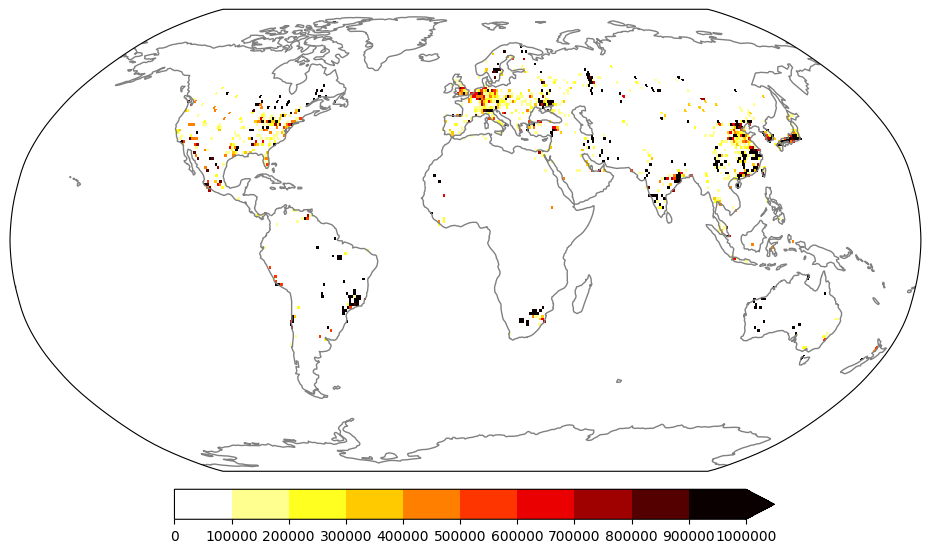

<GeoAxes: >

In [20]:
ssm.plot_map(source_1.isel(time=-1), "source_1", vmax=1000000, extend_max=True)

In [21]:
sink_1 = ds_steel["crude_steel"].to_dataset(name="sink_1")
source_2 = ds_steel["crude_steel"].to_dataset(name="source_2")
print(sink_1["sink_1"].isel(time=-1).sum().item() * 1e-6)
sink_1

1585.4326511466666


<xarray.Dataset> Size: 9MB
Dimensions:  (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    sink_1   (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

In [22]:
ds_gas = xr.open_dataset(netcdf_path + "T.iron_enduse.gas.2000-2016.a.nc")
ds_gas = ds_gas[["GAS_total"]] * ds_grid["grid_area"] * 0.97 * 1e-6 # g to tonne
ds_gas

<xarray.Dataset> Size: 9MB
Dimensions:    (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time       (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    GAS_total  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

In [23]:
sink_2 = ds_gas["GAS_total"].to_dataset(name="sink_2")
print(sink_2["sink_2"].isel(time=-1).sum().item() * 1e-6)
sink_2

1288.815313329361


<xarray.Dataset> Size: 9MB
Dimensions:  (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    sink_2   (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

In [24]:
ds_flow_raw = xr.merge([source_1, sink_1, source_2, sink_2])
ds_flow_raw

<xarray.Dataset> Size: 35MB
Dimensions:   (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon       (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time      (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    source_1  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan
    sink_1    (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan
    source_2  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan
    sink_2    (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

In [25]:
attrs_source_1 = {
    'long_name': 'Iron (Fe) outflow to steel plants from extraction and scrap sources',
    'units': 'tonnes Fe per grid'
}

attrs_sink_1 = {
    'long_name': 'Iron (Fe) inflow to steel production from extraction and scrap sources',
    'units': 'tonnes Fe per grid'
}

attrs_source_2 = {
    'long_name': 'Iron (Fe) outflow from steel plants',
    'units': 'tonnes Fe per grid'
}

attrs_sink_2 = {
    'long_name': 'Iron (Fe) inflow to end-use sectors from steel production',
    'units': 'tonnes Fe per grid'
}

ds_flow_raw["source_1"].attrs = attrs_source_1
ds_flow_raw["sink_1"].attrs = attrs_sink_2
ds_flow_raw["source_2"].attrs = attrs_source_2
ds_flow_raw["sink_2"].attrs = attrs_sink_2
ds_flow_raw

<xarray.Dataset> Size: 35MB
Dimensions:   (lon: 360, lat: 180, time: 17)
Coordinates:
  * lon       (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time      (time) datetime64[ns] 136B 2000-01-01 2001-01-01 ... 2016-01-01
Data variables:
    source_1  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan
    sink_1    (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan
    source_2  (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan
    sink_2    (time, lat, lon) float64 9MB nan nan nan nan ... nan nan nan nan

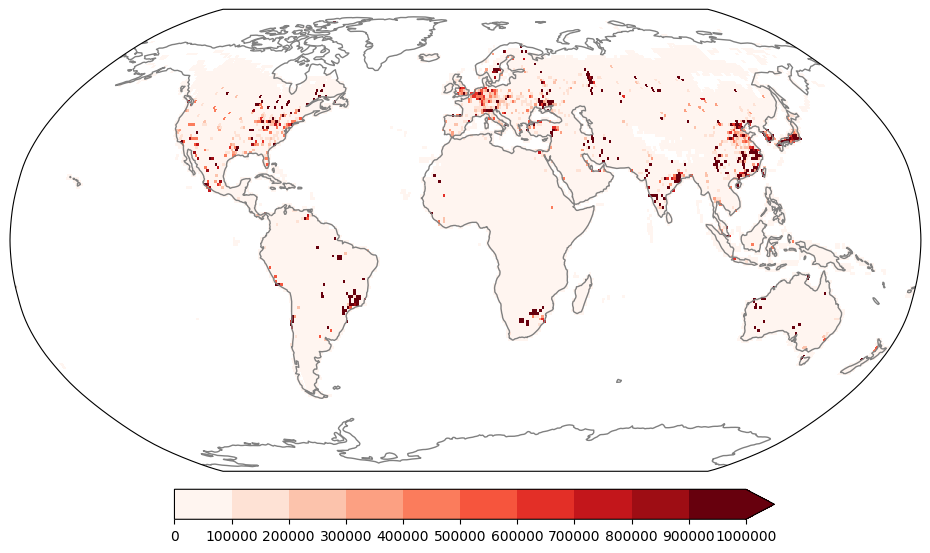

<GeoAxes: >

In [26]:
ssm.plot_map(ds_flow_raw.isel(time=-1), "source_1", color="Reds", vmin=0, vmax=1e6, extend_max=True)

In [27]:
ds_flow_raw.to_netcdf(netcdf_path + "L.T.iron_flows.2000-2016.raw.a.nc")

In [29]:
dfs = []
for year in ds_flow_raw["time"].dt.year.values:
    print(year)
    year_str = f"{year}-01-01"
    df = ssm.grid_2_table(grid_data=ds_flow_raw, time=year_str, resolution=1, aggregation="region_3", agg_function='SUM', verbose=True)
    df["Year"] = year
    dfs.append(df)

df_grid = pd.concat(dfs)
df_grid

2000
List of variables to process: ['source_1', 'sink_1', 'source_2', 'sink_2']
Global gridded stats for source_1: 955608989.11
Global tabular stats for source_1: 955608989.11
Global gridded stats for sink_1: 823670774.00
Global tabular stats for sink_1: 823670774.00
Global gridded stats for source_2: 823670774.00
Global tabular stats for source_2: 823670774.00
Global gridded stats for sink_2: 670220737.12
Global tabular stats for sink_2: 670220737.12
2001
List of variables to process: ['source_1', 'sink_1', 'source_2', 'sink_2']
Global gridded stats for source_1: 930673728.27
Global tabular stats for source_1: 930673728.27
Global gridded stats for sink_1: 825535351.16
Global tabular stats for sink_1: 825535351.16
Global gridded stats for source_2: 825535351.16
Global tabular stats for source_2: 825535351.16
Global gridded stats for sink_2: 673535792.05
Global tabular stats for sink_2: 673535792.05
2002
List of variables to process: ['source_1', 'sink_1', 'source_2', 'sink_2']
Global g

,region_3,source_1,sink_1,source_2,sink_2,Year
0,Afghanistan,1.528903e+05,975.350432,975.350432,5.622219e+04,2000
1,Albania,1.197233e+05,90574.761230,90574.761230,1.606081e+05,2000
2,Algeria,1.271740e+06,816740.000000,816740.000000,2.051532e+06,2000
3,American Samoa,0.000000e+00,0.000000,0.000000,0.000000e+00,2000
4,Andorra,8.817687e+02,0.000000,0.000000,6.031470e+03,2000
...,...,...,...,...,...,...
241,Wallis and Futuna Islands,0.000000e+00,0.000000,0.000000,0.000000e+00,2016
242,Western Sahara,8.675585e+02,0.000000,0.000000,6.600200e+03,2016
243,Yemen,1.092672e+05,0.000000,0.000000,8.047757e+05,2016
244,Zambia,7.389946e+04,85198.539420,85198.539420,4.666790e+05,2016


In [30]:
df_grid["source_1"].sum() * 1e-9

np.float64(24.849505963542256)

In [31]:
json_path = output_path + 'grouped_region.json'

df_grouped = df_grid.copy()
with open(json_path, 'r') as f:
    country_to_grouped_region = json.load(f)

    # Map exporters and importers to their grouped‐region codes
    df_grouped = ssm.add_iso3_column(df_grouped, "region_3")
    df_grouped['ISO3'] = df_grouped['ISO3'].map(country_to_grouped_region)
    # If ISO3 is missing, fill with original country name
    df_grouped['ISO3'] = df_grouped['ISO3'].fillna(df_grouped['ISO3'])
    # Now aggregate total_flow by (exp_region, imp_region, year)
    df_grouped = (
        df_grouped
        .groupby(['ISO3', 'Year'], as_index=False)
        .sum()
    )
    df_grouped = df_grouped.dropna()

df_grouped = df_grouped.rename(columns={'Year':'year'})
df_grouped = df_grouped.drop(columns="region_3")
df_grouped

,ISO3,year,source_1,sink_1,source_2,sink_2
0,AUS,2000,1.097292e+08,6.996610e+06,6.996610e+06,4.685312e+06
1,AUS,2001,1.157385e+08,6.842865e+06,6.842865e+06,4.838914e+06
2,AUS,2002,1.208339e+08,7.967903e+06,7.967903e+06,5.960205e+06
3,AUS,2003,1.360348e+08,9.379415e+06,9.379415e+06,7.000419e+06
4,AUS,2004,1.489605e+08,7.981645e+06,7.981645e+06,8.371784e+06
...,...,...,...,...,...,...
539,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07
540,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07
541,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08
542,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07


In [32]:
df_grouped["ISO3"].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHN', 'CZE', 'DEU', 'ESP',
       'FIN', 'FRA', 'GBR', 'GRC', 'IDN', 'IND', 'ITA', 'JPN', 'KOR',
       'MEX', 'NLD', 'POL', 'RUS', 'RoW Africa', 'RoW America',
       'RoW Asia and Pacific', 'RoW EU27', 'RoW Europe',
       'RoW Middle East', 'SVK', 'SWE', 'TWN', 'USA'], dtype=object)

In [33]:
df_grouped["source_1"].sum() * 1e-9

np.float64(24.81449629719498)

In [35]:
df_io_1 = pd.read_csv(output_path + 'iron_io_stage_1.csv')
df_io_1

,exporter,importer,year,tonnes,exp_ISO3,imp_ISO3
0,Australia,Australia,2008,1.340888e+06,AUS,AUS
1,Australia,Australia,2009,1.060436e+06,AUS,AUS
2,Australia,Australia,2010,1.335238e+06,AUS,AUS
3,Australia,Australia,2011,1.274265e+06,AUS,AUS
4,Australia,Australia,2012,1.029661e+06,AUS,AUS
...,...,...,...,...,...,...
9211,United States,United States,2012,4.559633e+06,USA,USA
9212,United States,United States,2013,4.461191e+06,USA,USA
9213,United States,United States,2014,4.524087e+06,USA,USA
9214,United States,United States,2015,4.094616e+06,USA,USA


In [36]:
# Original bilateral trade data
df_io_1["year"] = df_io_1["year"].astype(int)

# Total exports per exporter-country-year
df_io_1["export_total"] = df_io_1.groupby(["exp_ISO3", "year"])["tonnes"].transform('sum')

# Total imports per importer-country-year
df_io_1["import_total"] = df_io_1.groupby(["imp_ISO3", "year"])["tonnes"].transform('sum')

# Compute bilateral export/import proportions
df_io_1["export_prop"] = df_io_1["tonnes"] / df_io_1["export_total"]
df_io_1["import_prop"] = df_io_1["tonnes"] / df_io_1["import_total"]
df_io_1

,exporter,importer,year,tonnes,exp_ISO3,imp_ISO3,export_total,import_total,export_prop,import_prop
0,Australia,Australia,2008,1.340888e+06,AUS,AUS,2.129845e+08,8.489630e+06,0.006296,0.157944
1,Australia,Australia,2009,1.060436e+06,AUS,AUS,2.269584e+08,6.282512e+06,0.004672,0.168792
2,Australia,Australia,2010,1.335238e+06,AUS,AUS,2.628557e+08,7.209675e+06,0.005080,0.185201
3,Australia,Australia,2011,1.274265e+06,AUS,AUS,2.704577e+08,7.163142e+06,0.004712,0.177892
4,Australia,Australia,2012,1.029661e+06,AUS,AUS,3.092491e+08,5.420834e+06,0.003330,0.189945
...,...,...,...,...,...,...,...,...,...,...
9211,United States,United States,2012,4.559633e+06,USA,USA,7.051435e+07,6.653857e+07,0.064662,0.068526
9212,United States,United States,2013,4.461191e+06,USA,USA,6.940786e+07,6.413338e+07,0.064275,0.069561
9213,United States,United States,2014,4.524087e+06,USA,USA,6.988632e+07,6.536060e+07,0.064735,0.069217
9214,United States,United States,2015,4.094616e+06,USA,USA,6.494415e+07,6.049148e+07,0.063048,0.067689


In [37]:
df_io_1[(df_io_1["year"] == 2008) & (df_io_1["exp_ISO3"] == "AUS")]["export_prop"].sum()

np.float64(1.0)

In [38]:
# Recalculate exports and imports from trade data (after reduction)
exports_all = df_io_1.groupby(["exp_ISO3", "year"], as_index=False)["tonnes"].sum()
imports_all = df_io_1.groupby(["imp_ISO3", "year"], as_index=False)["tonnes"].sum()
exports_all, imports_all

(    exp_ISO3  year        tonnes
 0        AUS  2008  2.129845e+08
 1        AUS  2009  2.269584e+08
 2        AUS  2010  2.628557e+08
 3        AUS  2011  2.704577e+08
 4        AUS  2012  3.092491e+08
 ..       ...   ...           ...
 283      USA  2012  7.051435e+07
 284      USA  2013  6.940786e+07
 285      USA  2014  6.988632e+07
 286      USA  2015  6.494415e+07
 287      USA  2016  6.708962e+07
 
 [288 rows x 3 columns],
     imp_ISO3  year        tonnes
 0        AUS  2008  8.489630e+06
 1        AUS  2009  6.282512e+06
 2        AUS  2010  7.209675e+06
 3        AUS  2011  7.163142e+06
 4        AUS  2012  5.420834e+06
 ..       ...   ...           ...
 283      USA  2012  6.653857e+07
 284      USA  2013  6.413338e+07
 285      USA  2014  6.536060e+07
 286      USA  2015  6.049148e+07
 287      USA  2016  6.173283e+07
 
 [288 rows x 3 columns])

In [39]:
# Rename for merging
exports_all = exports_all.rename(columns={"tonnes": "exports_1", "exp_ISO3": "ISO3"})
imports_all = imports_all.rename(columns={"tonnes": "imports_1", "imp_ISO3": "ISO3"})
# Merge exports and imports
df_exp_imp = imports_all.merge(exports_all, on=["ISO3", "year"], how="outer").fillna(0)
df_exp_imp

,ISO3,year,imports_1,exports_1
0,AUS,2008,8.489630e+06,2.129845e+08
1,AUS,2009,6.282512e+06,2.269584e+08
2,AUS,2010,7.209675e+06,2.628557e+08
3,AUS,2011,7.163142e+06,2.704577e+08
4,AUS,2012,5.420834e+06,3.092491e+08
...,...,...,...,...
283,USA,2012,6.653857e+07,7.051435e+07
284,USA,2013,6.413338e+07,6.940786e+07
285,USA,2014,6.536060e+07,6.988632e+07
286,USA,2015,6.049148e+07,6.494415e+07


In [40]:
# Merge with source/sink data
df_comb_1 = df_grouped.merge(df_exp_imp, on=["ISO3", "year"], how="outer").fillna(0)
df_comb_1

,ISO3,year,source_1,sink_1,source_2,sink_2,imports_1,exports_1
0,AUS,2000,1.097292e+08,6.996610e+06,6.996610e+06,4.685312e+06,0.000000e+00,0.000000e+00
1,AUS,2001,1.157385e+08,6.842865e+06,6.842865e+06,4.838914e+06,0.000000e+00,0.000000e+00
2,AUS,2002,1.208339e+08,7.967903e+06,7.967903e+06,5.960205e+06,0.000000e+00,0.000000e+00
3,AUS,2003,1.360348e+08,9.379415e+06,9.379415e+06,7.000419e+06,0.000000e+00,0.000000e+00
4,AUS,2004,1.489605e+08,7.981645e+06,7.981645e+06,8.371784e+06,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
539,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07,6.653857e+07,7.051435e+07
540,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07,6.413338e+07,6.940786e+07
541,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08,6.536060e+07,6.988632e+07
542,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07,6.049148e+07,6.494415e+07


In [41]:
df_io_2 = pd.read_csv(output_path + 'iron_io_stage_2.csv')

# Original bilateral trade data
df_io_2["year"] = df_io_2["year"].astype(int)

# Total exports per exporter-country-year
df_io_2["export_total"] = df_io_2.groupby(["exp_ISO3", "year"])["tonnes"].transform('sum')

# Total imports per importer-country-year
df_io_2["import_total"] = df_io_2.groupby(["imp_ISO3", "year"])["tonnes"].transform('sum')

# Compute bilateral export/import proportions
df_io_2["export_prop"] = df_io_2["tonnes"] / df_io_2["export_total"]
df_io_2["import_prop"] = df_io_2["tonnes"] / df_io_2["import_total"]

# Recalculate exports and imports from trade data (after reduction)
exports_all = df_io_2.groupby(["exp_ISO3", "year"], as_index=False)["tonnes"].sum()
imports_all = df_io_2.groupby(["imp_ISO3", "year"], as_index=False)["tonnes"].sum()

# Rename for merging
exports_all = exports_all.rename(columns={"tonnes": "exports_2", "exp_ISO3": "ISO3"})
imports_all = imports_all.rename(columns={"tonnes": "imports_2", "imp_ISO3": "ISO3"})
# Merge exports and imports
df_exp_imp = imports_all.merge(exports_all, on=["ISO3", "year"], how="outer").fillna(0)

# Merge with source/sink data
df_comb_2 = df_grouped.merge(df_exp_imp, on=["ISO3", "year"], how="outer").fillna(0)
# Now compute combined metrics
df_comb_2

,ISO3,year,source_1,sink_1,source_2,sink_2,imports_2,exports_2
0,AUS,2000,1.097292e+08,6.996610e+06,6.996610e+06,4.685312e+06,0.000000e+00,0.000000e+00
1,AUS,2001,1.157385e+08,6.842865e+06,6.842865e+06,4.838914e+06,0.000000e+00,0.000000e+00
2,AUS,2002,1.208339e+08,7.967903e+06,7.967903e+06,5.960205e+06,0.000000e+00,0.000000e+00
3,AUS,2003,1.360348e+08,9.379415e+06,9.379415e+06,7.000419e+06,0.000000e+00,0.000000e+00
4,AUS,2004,1.489605e+08,7.981645e+06,7.981645e+06,8.371784e+06,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
539,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07,1.545936e+08,1.469142e+08
540,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07,1.592890e+08,1.499559e+08
541,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08,1.609773e+08,1.503123e+08
542,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07,1.602885e+08,1.483334e+08


In [42]:
df_comb_2.columns

Index(['ISO3', 'year', 'source_1', 'sink_1', 'source_2', 'sink_2', 'imports_2',
       'exports_2'],
      dtype='object')

In [43]:
df_comb = df_comb_1.merge(df_comb_2, on=['ISO3', 'year', 'source_1', 'sink_1', 'source_2', 'sink_2'], how='outer')
df_comb

,ISO3,year,source_1,sink_1,source_2,sink_2,imports_1,exports_1,imports_2,exports_2
0,AUS,2000,1.097292e+08,6.996610e+06,6.996610e+06,4.685312e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,AUS,2001,1.157385e+08,6.842865e+06,6.842865e+06,4.838914e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,AUS,2002,1.208339e+08,7.967903e+06,7.967903e+06,5.960205e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,AUS,2003,1.360348e+08,9.379415e+06,9.379415e+06,7.000419e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,AUS,2004,1.489605e+08,7.981645e+06,7.981645e+06,8.371784e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
539,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07,6.653857e+07,7.051435e+07,1.545936e+08,1.469142e+08
540,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07,6.413338e+07,6.940786e+07,1.592890e+08,1.499559e+08
541,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08,6.536060e+07,6.988632e+07,1.609773e+08,1.503123e+08
542,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07,6.049148e+07,6.494415e+07,1.602885e+08,1.483334e+08


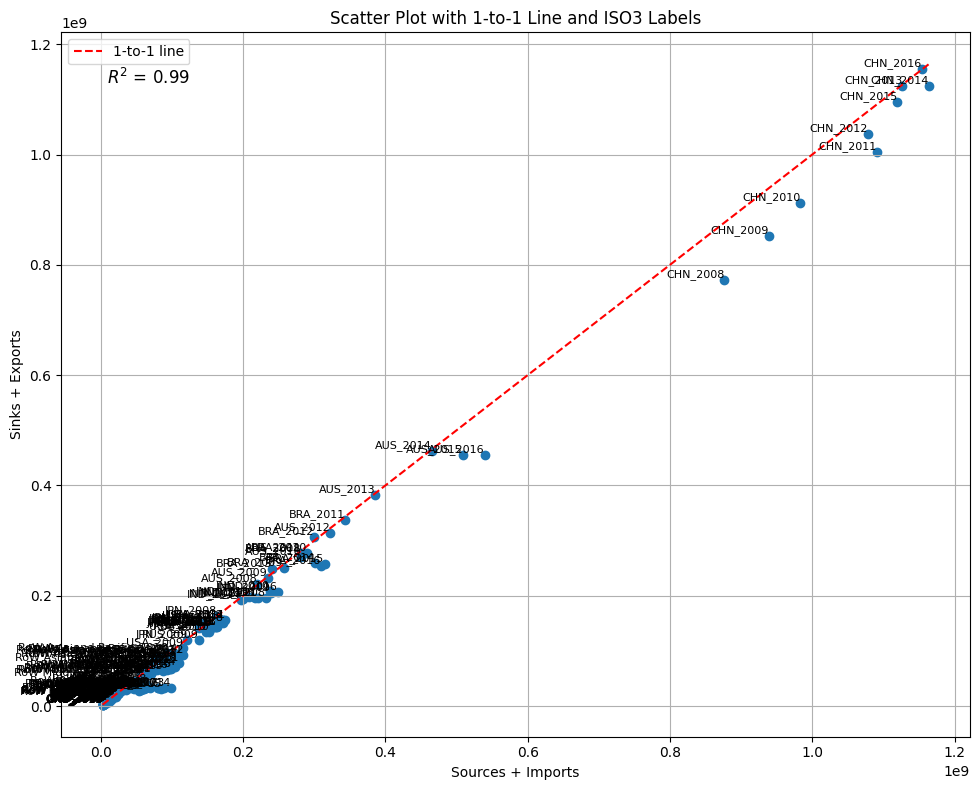

In [44]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Now compute combined metrics
df_comb["source_+_imports_1"] = df_comb["source_1"] + df_comb["imports_1"]
df_comb["sink_+_exports_1"] = df_comb["sink_1"] + df_comb["exports_1"]
df_comb["ISO3_y"] = df_comb["ISO3"] + "_" + df_comb["year"].astype(str)

# Extract x and y
df_comb = df_comb[(df_comb['imports_1'] != 0) & (df_comb['exports_1'] != 0)]
x = df_comb["source_+_imports_1"]
y = df_comb["sink_+_exports_1"]

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y)

# Add 1-to-1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='1-to-1 line')

# Label each point
for i in range(len(df_comb)):
    plt.text(x.iloc[i], y.iloc[i], df_comb["ISO3_y"].iloc[i], fontsize=8, ha='right', va='bottom')

# Linear regression for R^2
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y.values)
r2 = model.score(x.values.reshape(-1, 1), y.values)

# Add R^2 to plot
plt.text(0.05, 0.95, f'$R^2$ = {r2:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Labels and title
plt.xlabel("Sources + Imports")
plt.ylabel("Sinks + Exports")
plt.title("Scatter Plot with 1-to-1 Line and ISO3 Labels")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
import numpy as np
import pandas as pd
import cvxpy as cp


def robust_mass_balance_optimization_1(df, bounds_factor=100, priority_weights=None, solver=cp.SCS):
    epsilon = 1e-3
    
    variables = ['source_1', 'imports_1', 'sink_1', 'exports_1']
    n = len(df)

    orig_vals = {var: df[var].clip(lower=epsilon).values for var in variables}

    if priority_weights is None:
        priority_weights = {var: 1 for var in variables}

    adj_vars = {var: cp.Variable(n) for var in variables}

    objective = cp.Minimize(sum(
        priority_weights[var] * cp.sum_squares((adj_vars[var] - orig_vals[var]) / orig_vals[var])
        for var in variables
    ))

    constraints = [
        adj_vars['source_1'] + adj_vars['imports_1'] == adj_vars['sink_1'] + adj_vars['exports_1'],
        cp.sum(adj_vars['imports_1']) == cp.sum(adj_vars['exports_1']),
        cp.sum(adj_vars['source_1']) == cp.sum(adj_vars['sink_1']),
    ]

    for var in variables:
        constraints += [
            adj_vars[var] >= orig_vals[var] / bounds_factor,
            adj_vars[var] <= orig_vals[var] * bounds_factor,
            adj_vars[var] >= 0
        ]

    prob = cp.Problem(objective, constraints)

    if solver == cp.SCS:
        prob.solve(solver=solver, max_iters=int(1e7), eps=1e-6, verbose=True)
    else:
        prob.solve(solver=solver, max_iters=int(1e7), verbose=True)

    if prob.status not in ['optimal', 'optimal_inaccurate']:
        raise ValueError(f"Optimization failed: {prob.status}")

    for var in variables:
        df[f"{var}_adj"] = adj_vars[var].value

    return df

def robust_mass_balance_optimization_2(df, bounds_factor=100, priority_weights=None, solver=cp.SCS):
    epsilon = 1e-3
    
    variables = ['source_2', 'imports_2', 'sink_2', 'exports_2']
    n = len(df)

    orig_vals = {var: df[var].clip(lower=epsilon).values for var in variables}

    if priority_weights is None:
        priority_weights = {var: 1 for var in variables}

    adj_vars = {var: cp.Variable(n) for var in variables}

    objective = cp.Minimize(sum(
        priority_weights[var] * cp.sum_squares((adj_vars[var] - orig_vals[var]) / orig_vals[var])
        for var in variables
    ))

    constraints = [
        adj_vars['source_2'] + adj_vars['imports_2'] == adj_vars['sink_2'] + adj_vars['exports_2'],
        cp.sum(adj_vars['imports_2']) == cp.sum(adj_vars['exports_2']),
        cp.sum(adj_vars['source_2']) == cp.sum(adj_vars['sink_2']),
    ]

    for var in variables:
        constraints += [
            adj_vars[var] >= orig_vals[var] / bounds_factor,
            adj_vars[var] <= orig_vals[var] * bounds_factor,
            adj_vars[var] >= 0
        ]

    prob = cp.Problem(objective, constraints)

    if solver == cp.SCS:
        prob.solve(solver=solver, max_iters=int(1e7), eps=1e-6, verbose=True)
    else:
        prob.solve(solver=solver, max_iters=int(1e7), verbose=True)

    if prob.status not in ['optimal', 'optimal_inaccurate']:
        raise ValueError(f"Optimization failed: {prob.status}")

    for var in variables:
        df[f"{var}_adj"] = adj_vars[var].value

    return df


In [243]:
# Define your weights (priorities: higher = more strict control)
priority_weights = {
    'source_1': 1.0,
    'imports_1': 1.0,   # imports more reliable; stricter control
    'sink_1': 2.0,
    'exports_1': 0.5    # exports less reliable; looser control
}


dfs = []

for year in df_comb["year"].unique():
    print(year)
    df_comb_y = df_comb[df_comb["year"] == year].copy() 

    # Step 2: Find scaling factor (largest value among all columns)
    scaling_factor = df_comb_y[['source_1', 'imports_1', 'sink_1', 'exports_1']].max().max()

    # Step 3: Create a scaled copy for optimization
    df_scaled = df_comb_y.copy()
    df_scaled[['source_1', 'imports_1', 'sink_1', 'exports_1']] /= scaling_factor

    # Run optimization on scaled data
    result_scaled = robust_mass_balance_optimization_1(
        df_scaled, 
        bounds_factor=10, 
        priority_weights=priority_weights, 
        solver=cp.SCS
    )

    # Step 4: Immediately revert scaling (no data loss occurs here)
    for var in ['source_1_adj', 'imports_1_adj', 'sink_1_adj', 'exports_1_adj']:
        result_scaled[var] *= scaling_factor

    # Step 5: Merge optimized results back to original DataFrame safely
    for var in ['source_1_adj', 'imports_1_adj', 'sink_1_adj', 'exports_1_adj']:
        df_comb_y[var] = result_scaled[var]
    
    dfs.append(df_comb_y)

# Final DataFrame with original + adjusted values
df_combined_1 = pd.concat(dfs)
df_combined_1

(CVXPY) Jul 03 12:40:11 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 12:40:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 12:40:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 12:40:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 12:40:11 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 12:40:11 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 03 12:40:11 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jul 03 12:40:11 PM: Applying reduction Dcp2Cone
(CVXPY) Jul 03 12:40:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 03 12:40:11 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jul 03 12:40:11 PM: Applying reduction SCS
(CVXPY) Jul 03 12:40:11 PM: Finished problem compilation (took 3.4

2008
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings:

(CVXPY) Jul 03 12:40:11 PM: Finished problem compilation (took 4.586e-02 seconds).
(CVXPY) Jul 03 12:40:11 PM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jul 03 12:40:11 PM: Problem status: optimal
(CVXPY) Jul 03 12:40:11 PM: Optimal value: 8.874e-01
(CVXPY) Jul 03 12:40:11 PM: Compilation took 4.586e-02 seconds
(CVXPY) Jul 03 12:40:11 PM: Solver (including time spent in interface) took 8.464e-03 seconds
(CVXPY) Jul 03 12:40:11 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 12:40:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 12:40:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 12:40:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 12:40:11 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 12:40:11 PM: Compiling problem (target

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings: eps_abs: 1.0e-06, eps_rel: 1.0e-06, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 10000000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 896, nnz(P): 128
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | 

(CVXPY) Jul 03 12:40:11 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 03 12:40:11 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jul 03 12:40:11 PM: Applying reduction Dcp2Cone
(CVXPY) Jul 03 12:40:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 03 12:40:11 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jul 03 12:40:11 PM: Applying reduction SCS
(CVXPY) Jul 03 12:40:11 PM: Finished problem compilation (took 3.682e-02 seconds).
(CVXPY) Jul 03 12:40:11 PM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jul 03 12:40:11 PM: Problem status: optimal
(CVXPY) Jul 03 12:40:11 PM: Optimal value: 1.147e+00
(CVXPY) Jul 03 12:40:11 PM: Compilation took 3.682e-02 seconds
(CVXPY) Jul 03 12:40:11 PM: Solver (including time spent in interface) took 5.561e-03 seconds
(CVXPY) Jul 03 12:40:11 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 12:40:11 PM: It is compliant with the following grammars: DCP, DQCP
(CV

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings: eps_abs: 1.0e-06, eps_rel: 1.0e-06, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 10000000, normalize: 1, rho_x: 1.00e-06
	  

(CVXPY) Jul 03 12:40:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 12:40:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 12:40:11 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 12:40:11 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 03 12:40:11 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jul 03 12:40:11 PM: Applying reduction Dcp2Cone
(CVXPY) Jul 03 12:40:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 03 12:40:11 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jul 03 12:40:11 PM: Applying reduction SCS
(CVXPY) Jul 03 12:40:11 PM: Finished problem compilation (took 4.297e-02 seconds).
(CVXPY) Jul 03 12:40:11 PM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jul 03 12:40:11 PM: Problem status: optimal
(CVXPY) Jul 03 12:40:11 PM: Optimal va

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings: eps_abs: 1.0e-06, eps_rel: 1.0e-06, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 10000000, normalize: 1, rho_x: 1.00e-06
	  

,ISO3,year,source_1,sink_1,source_2,sink_2,imports_1,exports_1,imports_2,exports_2,source_+_imports_1,sink_+_exports_1,ISO3_y,source_1_adj,imports_1_adj,sink_1_adj,exports_1_adj
8,AUS,2008,2.117406e+08,7.492280e+06,7.492280e+06,1.055114e+07,8.489699e+06,2.129845e+08,8.694971e+06,8.887496e+06,2.202303e+08,2.204768e+08,AUS_2008,1.935503e+08,8.504343e+06,7.503667e+06,1.945510e+08
25,AUT,2008,2.910848e+06,6.988501e+06,6.988501e+06,3.343403e+06,6.855608e+06,2.833349e+06,8.878080e+06,1.033257e+07,9.766456e+06,9.821850e+06,AUT_2008,2.912349e+06,6.892554e+06,6.984175e+06,2.820728e+06
42,BEL,2008,3.679133e+06,9.711605e+06,9.711605e+06,4.488357e+06,1.206215e+07,6.317373e+06,1.556888e+07,1.260011e+07,1.574128e+07,1.602898e+07,BEL_2008,3.686256e+06,1.222730e+07,9.686790e+06,6.226769e+06
59,BRA,2008,2.416874e+08,3.270452e+07,3.270452e+07,2.133463e+07,3.948542e+07,2.438008e+08,1.592267e+07,2.149180e+07,2.811728e+08,2.765054e+08,BRA_2008,2.162877e+08,3.975681e+07,3.293706e+07,2.231075e+08
76,CAN,2008,2.731491e+07,1.400742e+07,1.400742e+07,1.514940e+07,1.332830e+07,2.143792e+07,1.760034e+07,1.812459e+07,4.064321e+07,3.544534e+07,CAN_2008,2.506020e+07,1.289963e+07,1.430389e+07,2.365595e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,RoW Middle East,2016,5.624593e+07,3.864118e+07,3.864118e+07,6.538839e+07,3.714858e+07,2.757447e+07,2.996399e+07,1.636053e+07,9.339451e+07,6.621564e+07,RoW Middle East_2016,4.317425e+07,3.190465e+07,4.172592e+07,3.335299e+07
492,SVK,2016,1.471070e+06,4.052200e+06,4.052200e+06,1.643789e+06,4.419528e+06,1.294165e+06,6.619692e+06,7.352211e+06,5.890598e+06,5.346365e+06,SVK_2016,1.435161e+06,4.101908e+06,4.188434e+06,1.348636e+06
509,SWE,2016,2.214060e+07,4.676765e+06,4.676765e+06,3.873490e+06,4.726150e+06,2.408527e+07,6.057559e+06,5.711225e+06,2.686675e+07,2.876203e+07,SWE_2016,2.257811e+07,4.753501e+06,4.667005e+06,2.266461e+07
526,TWN,2016,5.569365e+06,2.109847e+07,2.109847e+07,1.707285e+07,2.126878e+07,5.569523e+06,2.589254e+07,2.557331e+07,2.683815e+07,2.666799e+07,TWN_2016,5.555596e+06,2.121815e+07,2.119728e+07,5.576467e+06


In [336]:
# Define your weights (priorities: higher = more strict control)
priority_weights = {
    'source_2': 2.0,
    'imports_2': 1.0,   # imports more reliable; stricter control
    'sink_2': 1.0,
    'exports_2': 0.5    # exports less reliable; looser control
}


dfs = []

for year in df_comb["year"].unique():
    print(year)
    df_comb_y = df_comb[df_comb["year"] == year].copy() 

    # Step 2: Find scaling factor (largest value among all columns)
    scaling_factor = df_comb_y[['source_2', 'imports_2', 'sink_2', 'exports_2']].max().max()

    # Step 3: Create a scaled copy for optimization
    df_scaled = df_comb_y.copy()
    df_scaled[['source_2', 'imports_2', 'sink_2', 'exports_2']] /= scaling_factor

    # Run optimization on scaled data
    result_scaled = robust_mass_balance_optimization_2(
        df_scaled, 
        bounds_factor=10, 
        priority_weights=priority_weights, 
        solver=cp.SCS
    )

    # Step 4: Immediately revert scaling (no data loss occurs here)
    for var in ['source_2_adj', 'imports_2_adj', 'sink_2_adj', 'exports_2_adj']:
        result_scaled[var] *= scaling_factor

    # Step 5: Merge optimized results back to original DataFrame safely
    for var in ['source_2_adj', 'imports_2_adj', 'sink_2_adj', 'exports_2_adj']:
        df_comb_y[var] = result_scaled[var]
    
    dfs.append(df_comb_y)

# Final DataFrame with original + adjusted values
df_combined_2 = pd.concat(dfs)
df_combined_2

(CVXPY) Jul 03 02:40:29 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 02:40:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 02:40:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 02:40:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 02:40:29 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 02:40:29 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 03 02:40:29 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jul 03 02:40:29 PM: Applying reduction Dcp2Cone
(CVXPY) Jul 03 02:40:29 PM: Applying reduction CvxAttr2Constr


2008
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Jul 03 02:40:29 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jul 03 02:40:30 PM: Applying reduction SCS
(CVXPY) Jul 03 02:40:30 PM: Finished problem compilation (took 2.007e-01 seconds).
(CVXPY) Jul 03 02:40:30 PM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jul 03 02:40:30 PM: Problem status: optimal
(CVXPY) Jul 03 02:40:30 PM: Optimal value: 1.854e+00
(CVXPY) Jul 03 02:40:30 PM: Compilation took 2.007e-01 seconds
(CVXPY) Jul 03 02:40:30 PM: Solver (including time spent in interface) took 4.567e-02 seconds
(CVXPY) Jul 03 02:40:30 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 02:40:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 02:40:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 02:40:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 02:40:30 PM: 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings: eps_abs: 1.0e-06, eps_rel: 1.0e-06, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 10000000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 896, nnz(P): 128
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | 

(CVXPY) Jul 03 02:40:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 02:40:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 02:40:30 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 02:40:30 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 03 02:40:30 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jul 03 02:40:30 PM: Applying reduction Dcp2Cone
(CVXPY) Jul 03 02:40:30 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 03 02:40:30 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jul 03 02:40:30 PM: Applying reduction SCS
(CVXPY) Jul 03 02:40:30 PM: Finished problem compilation (took 6.321e-02 seconds).
(CVXPY) Jul 03 02:40:30 PM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jul 03 02:40:30 PM: Problem status: optimal
(CVXPY) Jul 03 02:40:30 PM: Optimal va

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings: eps_abs: 1.0e-06, eps_rel: 1.0e-06, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 10000000, normalize: 1, rho_x: 1.00e-06
	  

(CVXPY) Jul 03 02:40:30 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 02:40:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 02:40:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 02:40:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 02:40:30 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 02:40:30 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 03 02:40:30 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jul 03 02:40:30 PM: Applying reduction Dcp2Cone
(CVXPY) Jul 03 02:40:30 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 03 02:40:30 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jul 03 02:40:30 PM: Applying reduction SCS
(CVXPY) Jul 03 02:40:30 PM: Finished problem compilation (took 4.5

2011
                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings:

(CVXPY) Jul 03 02:40:30 PM: Finished problem compilation (took 4.773e-02 seconds).
(CVXPY) Jul 03 02:40:30 PM: Invoking solver SCS  to obtain a solution.
(CVXPY) Jul 03 02:40:30 PM: Problem status: optimal
(CVXPY) Jul 03 02:40:30 PM: Optimal value: 2.380e+00
(CVXPY) Jul 03 02:40:30 PM: Compilation took 4.773e-02 seconds
(CVXPY) Jul 03 02:40:30 PM: Solver (including time spent in interface) took 8.646e-03 seconds
(CVXPY) Jul 03 02:40:30 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 02:40:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 02:40:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 02:40:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 02:40:30 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 02:40:30 PM: Compiling problem (target

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings: eps_abs: 1.0e-06, eps_rel: 1.0e-06, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 10000000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 896, nnz(P): 128
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | 

(CVXPY) Jul 03 02:40:31 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 02:40:31 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 02:40:31 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 02:40:31 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 02:40:31 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 02:40:31 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 03 02:40:31 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jul 03 02:40:31 PM: Applying reduction Dcp2Cone
(CVXPY) Jul 03 02:40:31 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 03 02:40:31 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Jul 03 02:40:31 PM: Applying reduction SCS
(CVXPY) Jul 03 02:40:31 PM: Finished problem compilation (took 5.6

                                     CVXPY                                     
                                     v1.6.6                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
------------------------------------------------------------------
	       SCS v3.2.7 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 256, constraints m: 546
cones: 	  z: primal zero / dual free vars: 162
	  l: linear vars: 384
settings: eps_

(CVXPY) Jul 03 02:40:31 PM: Problem status: optimal
(CVXPY) Jul 03 02:40:31 PM: Optimal value: 2.114e+00
(CVXPY) Jul 03 02:40:31 PM: Compilation took 4.565e-02 seconds
(CVXPY) Jul 03 02:40:31 PM: Solver (including time spent in interface) took 8.046e-03 seconds
(CVXPY) Jul 03 02:40:31 PM: Your problem has 128 variables, 418 constraints, and 0 parameters.
(CVXPY) Jul 03 02:40:31 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 03 02:40:31 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 03 02:40:31 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 03 02:40:31 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jul 03 02:40:31 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 03 02:40:31 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> SCS
(CVXPY) Jul 03 02:40:31 PM: Applying re

------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.00e+01  1.60e+00  1.34e+01 -2.92e+00  1.00e-01  3.98e-03 
    75| 1.17e-08  9.18e-10  2.43e-08  2.11e+00  1.00e-01  6.87e-03 
------------------------------------------------------------------
status:  solved
timings: total: 6.89e-03s = setup: 2.17e-03s + solve: 4.72e-03s
	 lin-sys: 1.47e-03s, cones: 2.28e-04s, accel: 4.21e-05s
------------------------------------------------------------------
objective = 2.114302
------------------------------------------------------------------
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
2016
                                     CVXPY                 

,ISO3,year,source_1,sink_1,source_2,sink_2,imports_1,exports_1,imports_2,exports_2,source_+_imports_1,sink_+_exports_1,ISO3_y,source_2_adj,imports_2_adj,sink_2_adj,exports_2_adj
8,AUS,2008,2.117406e+08,7.492280e+06,7.492280e+06,1.055114e+07,8.489699e+06,2.129845e+08,8.694971e+06,8.887496e+06,2.202303e+08,2.204768e+08,AUS_2008,7.696090e+06,9.987717e+06,1.014694e+07,7.536866e+06
25,AUT,2008,2.910848e+06,6.988501e+06,6.988501e+06,3.343403e+06,6.855608e+06,2.833349e+06,8.878080e+06,1.033257e+07,9.766456e+06,9.821850e+06,AUT_2008,6.826056e+06,8.032472e+06,3.380583e+06,1.147795e+07
42,BEL,2008,3.679133e+06,9.711605e+06,9.711605e+06,4.488357e+06,1.206215e+07,6.317373e+06,1.556888e+07,1.260011e+07,1.574128e+07,1.602898e+07,BEL_2008,9.205458e+06,1.099014e+07,4.596467e+06,1.559913e+07
59,BRA,2008,2.416874e+08,3.270452e+07,3.270452e+07,2.133463e+07,3.948542e+07,2.438008e+08,1.592267e+07,2.149180e+07,2.811728e+08,2.765054e+08,BRA_2008,3.084067e+07,1.480860e+07,2.212780e+07,2.352148e+07
76,CAN,2008,2.731491e+07,1.400742e+07,1.400742e+07,1.514940e+07,1.332830e+07,2.143792e+07,1.760034e+07,1.812459e+07,4.064321e+07,3.544534e+07,CAN_2008,1.400887e+07,1.840748e+07,1.514771e+07,1.726864e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,RoW Middle East,2016,5.624593e+07,3.864118e+07,3.864118e+07,6.538839e+07,3.714858e+07,2.757447e+07,2.996399e+07,1.636053e+07,9.339451e+07,6.621564e+07,RoW Middle East_2016,4.027662e+07,3.522173e+07,6.070527e+07,1.479308e+07
492,SVK,2016,1.471070e+06,4.052200e+06,4.052200e+06,1.643789e+06,4.419528e+06,1.294165e+06,6.619692e+06,7.352211e+06,5.890598e+06,5.346365e+06,SVK_2016,3.979411e+06,5.907320e+06,1.655766e+06,8.230965e+06
509,SWE,2016,2.214060e+07,4.676765e+06,4.676765e+06,3.873490e+06,4.726150e+06,2.408527e+07,6.057559e+06,5.711225e+06,2.686675e+07,2.876203e+07,SWE_2016,4.589602e+06,5.526752e+06,3.933282e+06,6.183071e+06
526,TWN,2016,5.569365e+06,2.109847e+07,2.109847e+07,1.707285e+07,2.126878e+07,5.569523e+06,2.589254e+07,2.557331e+07,2.683815e+07,2.666799e+07,TWN_2016,2.063387e+07,2.408235e+07,1.737707e+07,2.733914e+07


In [246]:
df_combined_1.columns

Index(['ISO3', 'year', 'source_1', 'sink_1', 'source_2', 'sink_2', 'imports_1',
       'exports_1', 'imports_2', 'exports_2', 'source_+_imports_1',
       'sink_+_exports_1', 'ISO3_y', 'source_1_adj', 'imports_1_adj',
       'sink_1_adj', 'exports_1_adj'],
      dtype='object')

In [249]:
df_combined = df_combined_1.merge(df_combined_2, on=['ISO3', 'year', 'source_1', 'sink_1', 'source_2', 'sink_2', 'imports_1', 'exports_1', 'imports_2', 'exports_2', 'source_+_imports_1', 'sink_+_exports_1', 'ISO3_y'], how="outer")
df_combined

,ISO3,year,source_1,sink_1,source_2,sink_2,imports_1,exports_1,imports_2,exports_2,...,sink_+_exports_1,ISO3_y,source_1_adj,imports_1_adj,sink_1_adj,exports_1_adj,source_2_adj,imports_2_adj,sink_2_adj,exports_2_adj
0,AUS,2008,2.117406e+08,7.492280e+06,7.492280e+06,1.055114e+07,8.489699e+06,2.129845e+08,8.694971e+06,8.887496e+06,...,2.204768e+08,AUS_2008,1.935503e+08,8.504343e+06,7.503667e+06,1.945510e+08,7.718363e+06,9.383926e+06,9.654398e+06,7.447891e+06
1,AUS,2009,2.286155e+08,5.036240e+06,5.036240e+06,7.789715e+06,6.282547e+06,2.269584e+08,7.120452e+06,6.800175e+06,...,2.319946e+08,AUS_2009,2.087249e+08,6.289055e+06,5.041066e+06,2.099729e+08,5.172404e+06,7.703118e+06,7.138204e+06,5.737318e+06
2,AUS,2010,2.742369e+08,7.131440e+06,7.131440e+06,1.020627e+07,7.209716e+06,2.628557e+08,8.289156e+06,8.056549e+06,...,2.699871e+08,AUS_2010,2.499907e+08,7.214527e+06,7.139638e+06,2.500656e+08,7.340426e+06,8.904223e+06,9.350162e+06,6.894487e+06
3,AUS,2011,2.744648e+08,6.341860e+06,6.341860e+06,9.927931e+06,7.163171e+06,2.704577e+08,8.533978e+06,8.188288e+06,...,2.767996e+08,AUS_2011,2.536869e+08,7.168765e+06,6.347407e+06,2.545083e+08,6.533310e+06,9.276809e+06,8.989570e+06,6.820549e+06
4,AUS,2012,3.172262e+08,4.746695e+06,4.746695e+06,1.054152e+07,5.420853e+06,3.092491e+08,8.020831e+06,7.151797e+06,...,3.139958e+08,AUS_2012,2.976911e+08,5.422525e+06,4.748882e+06,2.983647e+08,4.934242e+06,9.135956e+06,8.691550e+06,5.378648e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07,6.653872e+07,7.051435e+07,9.681763e+07,9.163261e+07,...,1.567859e+08,USA_2012,9.810834e+07,6.484371e+07,8.863049e+07,7.432156e+07,8.431022e+07,9.830394e+07,9.364430e+07,8.896986e+07
284,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07,6.413349e+07,6.940786e+07,1.016688e+08,9.623425e+07,...,1.537816e+08,USA_2013,9.689264e+07,6.252792e+07,8.625166e+07,7.316890e+07,8.303241e+07,1.038509e+08,9.455921e+07,9.232411e+07
285,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08,6.536070e+07,6.988632e+07,1.021158e+08,9.649540e+07,...,1.555441e+08,USA_2014,9.872229e+07,6.350885e+07,8.811046e+07,7.412068e+07,8.501923e+07,1.066518e+08,1.032765e+08,8.839452e+07
286,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07,6.049159e+07,6.494415e+07,9.657108e+07,9.028777e+07,...,1.417558e+08,USA_2015,8.847352e+07,5.895457e+07,7.894071e+07,6.848738e+07,7.612320e+07,1.007266e+08,9.382680e+07,8.302301e+07


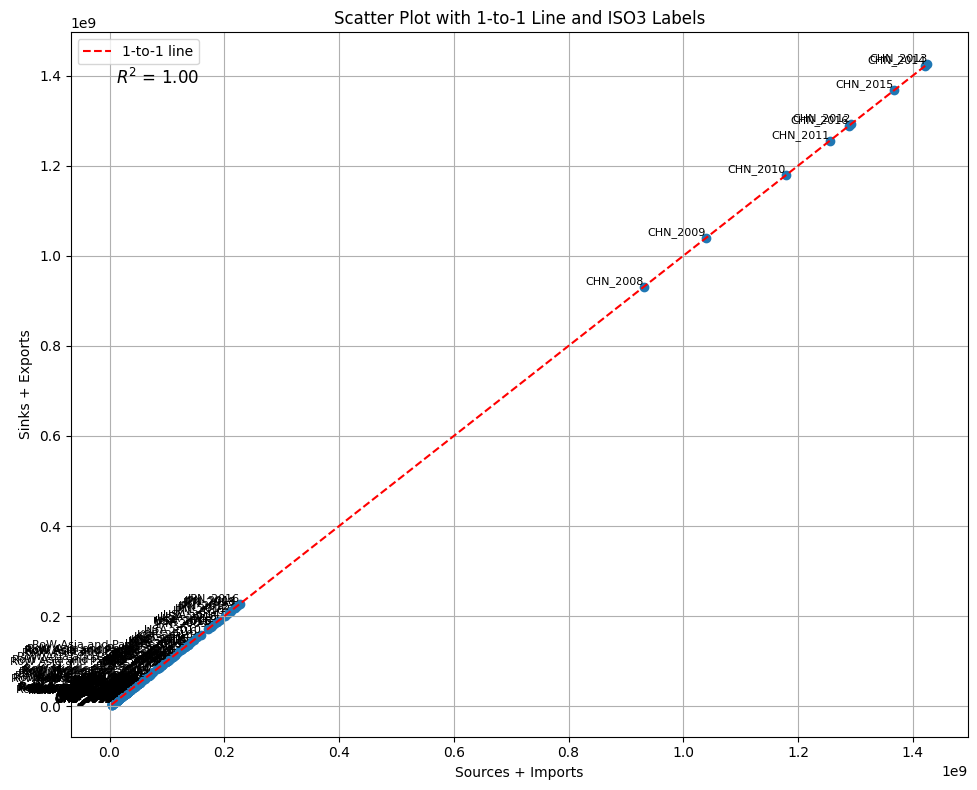

In [250]:
df_combined["source_+_imports_2_adj"] = df_combined["source_2_adj"] + df_combined["imports_2_adj"]
df_combined["sink_+_exports_2_adj"] = df_combined["sink_2_adj"] + df_combined["exports_2_adj"]

x = df_combined["source_+_imports_2_adj"]
y = df_combined["sink_+_exports_2_adj"]

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y)

# Add 1-to-1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='1-to-1 line')

# Label each point
for i in range(len(df_combined)):
    plt.text(x.iloc[i], y.iloc[i], df_combined["ISO3_y"].iloc[i], fontsize=8, ha='right', va='bottom')

# Linear regression for R^2
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y.values)
r2 = model.score(x.values.reshape(-1, 1), y.values)

# Add R^2 to plot
plt.text(0.05, 0.95, f'$R^2$ = {r2:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Labels and title
plt.xlabel("Sources + Imports")
plt.ylabel("Sinks + Exports")
plt.title("Scatter Plot with 1-to-1 Line and ISO3 Labels")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [319]:
# Merge adjusted totals back to bilateral pairs for exporters
df_io_1 = df_io_1.merge(df_combined[["ISO3", "year", "exports_1_adj"]].rename(columns={"ISO3": "exp_ISO3"}),
                        on=["exp_ISO3", "year"], how='left')

# Merge adjusted totals back to bilateral pairs for importers
df_io_1 = df_io_1.merge(df_combined[["ISO3", "year", "imports_1_adj"]].rename(columns={"ISO3": "imp_ISO3"}),
                        on=["imp_ISO3", "year"], how='left')
df_io_1

,exporter,importer,year,tonnes,exp_ISO3,imp_ISO3,export_total,import_total,export_prop,import_prop,exports_1_adj,imports_1_adj
0,Australia,Australia,2008,1.340888e+06,AUS,AUS,2.129845e+08,8.489699e+06,0.006296,0.157943,1.945510e+08,8.504343e+06
1,Australia,Australia,2009,1.060436e+06,AUS,AUS,2.269584e+08,6.282547e+06,0.004672,0.168791,2.099729e+08,6.289055e+06
2,Australia,Australia,2010,1.335238e+06,AUS,AUS,2.628557e+08,7.209716e+06,0.005080,0.185200,2.500656e+08,7.214527e+06
3,Australia,Australia,2011,1.274265e+06,AUS,AUS,2.704577e+08,7.163171e+06,0.004712,0.177891,2.545083e+08,7.168765e+06
4,Australia,Australia,2012,1.029661e+06,AUS,AUS,3.092491e+08,5.420853e+06,0.003330,0.189944,2.983647e+08,5.422525e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
9211,United States,United States,2012,4.559633e+06,USA,USA,7.051435e+07,6.653872e+07,0.064662,0.068526,7.432156e+07,6.484371e+07
9212,United States,United States,2013,4.461191e+06,USA,USA,6.940786e+07,6.413349e+07,0.064275,0.069561,7.316890e+07,6.252792e+07
9213,United States,United States,2014,4.524087e+06,USA,USA,6.988632e+07,6.536070e+07,0.064735,0.069217,7.412068e+07,6.350885e+07
9214,United States,United States,2015,4.094616e+06,USA,USA,6.494415e+07,6.049159e+07,0.063048,0.067689,6.848738e+07,5.895457e+07


In [320]:
# Redistribute adjusted totals using original proportions
df_io_1["tonnes_adj_exports"] = df_io_1["exports_1_adj"] * df_io_1["export_prop"]
df_io_1["tonnes_adj_imports"] = df_io_1["imports_1_adj"] * df_io_1["import_prop"]

# To ensure bilateral consistency, average both redistributed values:
df_io_1["tonnes_adj_1"] = (df_io_1["tonnes_adj_exports"] + df_io_1["tonnes_adj_imports"]) / 2
df_io_1

,exporter,importer,year,tonnes,exp_ISO3,imp_ISO3,export_total,import_total,export_prop,import_prop,exports_1_adj,imports_1_adj,tonnes_adj_exports,tonnes_adj_imports,tonnes_adj_1
0,Australia,Australia,2008,1.340888e+06,AUS,AUS,2.129845e+08,8.489699e+06,0.006296,0.157943,1.945510e+08,8.504343e+06,1.224836e+06,1.343201e+06,1.284019e+06
1,Australia,Australia,2009,1.060436e+06,AUS,AUS,2.269584e+08,6.282547e+06,0.004672,0.168791,2.099729e+08,6.289055e+06,9.810734e+05,1.061534e+06,1.021304e+06
2,Australia,Australia,2010,1.335238e+06,AUS,AUS,2.628557e+08,7.209716e+06,0.005080,0.185200,2.500656e+08,7.214527e+06,1.270268e+06,1.336129e+06,1.303198e+06
3,Australia,Australia,2011,1.274265e+06,AUS,AUS,2.704577e+08,7.163171e+06,0.004712,0.177891,2.545083e+08,7.168765e+06,1.199119e+06,1.275260e+06,1.237190e+06
4,Australia,Australia,2012,1.029661e+06,AUS,AUS,3.092491e+08,5.420853e+06,0.003330,0.189944,2.983647e+08,5.422525e+06,9.934207e+05,1.029979e+06,1.011700e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,United States,United States,2012,4.559633e+06,USA,USA,7.051435e+07,6.653872e+07,0.064662,0.068526,7.432156e+07,6.484371e+07,4.805817e+06,4.443481e+06,4.624649e+06
9212,United States,United States,2013,4.461191e+06,USA,USA,6.940786e+07,6.413349e+07,0.064275,0.069561,7.316890e+07,6.252792e+07,4.702931e+06,4.349506e+06,4.526218e+06
9213,United States,United States,2014,4.524087e+06,USA,USA,6.988632e+07,6.536070e+07,0.064735,0.069217,7.412068e+07,6.350885e+07,4.798199e+06,4.395907e+06,4.597053e+06
9214,United States,United States,2015,4.094616e+06,USA,USA,6.494415e+07,6.049159e+07,0.063048,0.067689,6.848738e+07,5.895457e+07,4.318011e+06,3.990577e+06,4.154294e+06


In [321]:
print(df_io_1[(df_io_1["exp_ISO3"] == "AUS") & (df_io_1["year"] == 2016)]["tonnes"].sum() * 1e-6)
print(df_io_1[(df_io_1["exp_ISO3"] == "AUS") & (df_io_1["year"] == 2016)]["tonnes_adj_1"].sum() * 1e-6)

449.35043067495644
452.99757400654477


In [322]:
print(df_io_1[(df_io_1["imp_ISO3"] == "CHN") & (df_io_1["year"] == 2016)]["tonnes"].sum() * 1e-6)
print(df_io_1[(df_io_1["imp_ISO3"] == "CHN") & (df_io_1["year"] == 2016)]["tonnes_adj_1"].sum() * 1e-6)

854.3203194380245
899.2241276344397


In [323]:
# Merge adjusted totals back to bilateral pairs for exporters
df_io_2 = df_io_2.merge(df_combined[["ISO3", "year", "exports_2_adj"]].rename(columns={"ISO3": "exp_ISO3"}),
                        on=["exp_ISO3", "year"], how='left')

# Merge adjusted totals back to bilateral pairs for importers
df_io_2 = df_io_2.merge(df_combined[["ISO3", "year", "imports_2_adj"]].rename(columns={"ISO3": "imp_ISO3"}),
                        on=["imp_ISO3", "year"], how='left')

# Redistribute adjusted totals using original proportions
df_io_2["tonnes_adj_exports"] = df_io_2["exports_2_adj"] * df_io_2["export_prop"]
df_io_2["tonnes_adj_imports"] = df_io_2["imports_2_adj"] * df_io_2["import_prop"]

# To ensure bilateral consistency, average both redistributed values:
df_io_2["tonnes_adj_2"] = (df_io_2["tonnes_adj_exports"] + df_io_2["tonnes_adj_imports"]) / 2

print(df_io_2[(df_io_2["exp_ISO3"] == "AUS") & (df_io_2["year"] == 2016)]["tonnes"].sum() * 1e-6)
print(df_io_2[(df_io_2["exp_ISO3"] == "AUS") & (df_io_2["year"] == 2016)]["tonnes_adj_2"].sum() * 1e-6)
print(df_io_2[(df_io_2["imp_ISO3"] == "CHN") & (df_io_2["year"] == 2016)]["tonnes"].sum() * 1e-6)
print(df_io_2[(df_io_2["imp_ISO3"] == "CHN") & (df_io_2["year"] == 2016)]["tonnes_adj_2"].sum() * 1e-6)
df_io_2

7.348873711349401
6.726215512347732
658.1864890598602
670.7318713395448


,exporter,importer,tonnes,year,yearly_share,total_source_1,exp_ISO3,imp_ISO3,export_total,import_total,export_prop,import_prop,exports_2_adj,imports_2_adj,tonnes_adj_exports,tonnes_adj_imports,tonnes_adj_2
0,Australia,Australia,5.973075e+04,2008,0.000046,1.293748e+09,AUS,AUS,8.887496e+06,8.694971e+06,0.006721,0.006870,7.447891e+06,9.383926e+06,5.005550e+04,6.446357e+04,5.725954e+04
1,Austria,Australia,6.944276e+04,2008,0.000054,1.293748e+09,AUT,AUS,1.033257e+07,8.694971e+06,0.006721,0.007987,1.173437e+07,9.383926e+06,7.886387e+04,7.494513e+04,7.690450e+04
2,Belgium,Australia,8.468231e+04,2008,0.000065,1.293748e+09,BEL,AUS,1.260011e+07,8.694971e+06,0.006721,0.009739,1.671123e+07,9.383926e+06,1.123122e+05,9.139220e+04,1.018522e+05
3,Brazil,Australia,1.444413e+05,2008,0.000112,1.293748e+09,BRA,AUS,2.149180e+07,8.694971e+06,0.006721,0.016612,2.351801e+07,9.383926e+06,1.580589e+05,1.558863e+05,1.569726e+05
4,Canada,Australia,1.218111e+05,2008,0.000094,1.293748e+09,CAN,AUS,1.812459e+07,8.694971e+06,0.006721,0.014009,1.710295e+07,9.383926e+06,1.149449e+05,1.314629e+05,1.232039e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,Spain,United States,1.157551e+06,2016,0.000730,1.585433e+09,ESP,USA,1.720786e+07,1.066500e+08,0.067269,0.010854,2.146712e+07,1.115486e+08,1.444066e+06,1.210718e+06,1.327392e+06
9212,Sweden,United States,3.841868e+05,2016,0.000242,1.585433e+09,SWE,USA,5.711225e+06,1.066500e+08,0.067269,0.003602,6.289360e+06,1.115486e+08,4.230772e+05,4.018329e+05,4.124551e+05
9213,Taiwan,United States,1.720284e+06,2016,0.001085,1.585433e+09,TWN,USA,2.557331e+07,1.066500e+08,0.067269,0.016130,2.768283e+07,1.115486e+08,1.862188e+06,1.799298e+06,1.830743e+06
9214,United Kingdom,United States,7.595541e+05,2016,0.000479,1.585433e+09,GBR,USA,1.129134e+07,1.066500e+08,0.067269,0.007122,8.527977e+06,1.115486e+08,5.736661e+05,7.944413e+05,6.840537e+05


In [324]:
df_io_2 = df_io_2[['exporter', 'importer', 'tonnes', 'year', 'exp_ISO3', 'imp_ISO3', 'tonnes_adj_2']]
df_io_2

,exporter,importer,tonnes,year,exp_ISO3,imp_ISO3,tonnes_adj_2
0,Australia,Australia,5.973075e+04,2008,AUS,AUS,5.725954e+04
1,Austria,Australia,6.944276e+04,2008,AUT,AUS,7.690450e+04
2,Belgium,Australia,8.468231e+04,2008,BEL,AUS,1.018522e+05
3,Brazil,Australia,1.444413e+05,2008,BRA,AUS,1.569726e+05
4,Canada,Australia,1.218111e+05,2008,CAN,AUS,1.232039e+05
...,...,...,...,...,...,...,...
9211,Spain,United States,1.157551e+06,2016,ESP,USA,1.327392e+06
9212,Sweden,United States,3.841868e+05,2016,SWE,USA,4.124551e+05
9213,Taiwan,United States,1.720284e+06,2016,TWN,USA,1.830743e+06
9214,United Kingdom,United States,7.595541e+05,2016,GBR,USA,6.840537e+05


In [325]:
df_io_2.to_csv(output_path + 'iron_io_stage_2_adj.csv', index=False)

In [326]:
df_io_1 = df_io_1[['exporter', 'importer', 'tonnes', 'year', 'exp_ISO3', 'imp_ISO3', 'tonnes_adj_1']]
df_io_1

,exporter,importer,tonnes,year,exp_ISO3,imp_ISO3,tonnes_adj_1
0,Australia,Australia,1.340888e+06,2008,AUS,AUS,1.284019e+06
1,Australia,Australia,1.060436e+06,2009,AUS,AUS,1.021304e+06
2,Australia,Australia,1.335238e+06,2010,AUS,AUS,1.303198e+06
3,Australia,Australia,1.274265e+06,2011,AUS,AUS,1.237190e+06
4,Australia,Australia,1.029661e+06,2012,AUS,AUS,1.011700e+06
...,...,...,...,...,...,...,...
9211,United States,United States,4.559633e+06,2012,USA,USA,4.624649e+06
9212,United States,United States,4.461191e+06,2013,USA,USA,4.526218e+06
9213,United States,United States,4.524087e+06,2014,USA,USA,4.597053e+06
9214,United States,United States,4.094616e+06,2015,USA,USA,4.154294e+06


In [327]:
df_io_1.to_csv(output_path + '/iron_io_stage_1_adj.csv', index=False)

# Prepare Optimized Gridded Data for GM

In [177]:
from collections import defaultdict

grouped_to_countries = defaultdict(list)
for iso3, region in country_to_grouped_region.items():
    grouped_to_countries[region].append(iso3)

grouped_to_countries

defaultdict(list,
            {'RoW America': ['ABW',
              'AIA',
              'ANT',
              'ARG',
              'ATG',
              'BHS',
              'BLZ',
              'BMU',
              'BOL',
              'BRB',
              'CHL',
              'COL',
              'CRI',
              'CUB',
              'CUW',
              'CYM',
              'DMA',
              'DOM',
              'ECU',
              'GRD',
              'GRL',
              'GTM',
              'GUY',
              'HND',
              'HTI',
              'JAM',
              'KNA',
              'LCA',
              'MSR',
              'NIC',
              'PAN',
              'PER',
              'PRI',
              'PRY',
              'SLV',
              'SUR',
              'SXM',
              'TCA',
              'TTO',
              'URY',
              'VCT',
              'VEN',
              'VGB'],
             'RoW Asia and Pacific': ['AFG',
              'ARM

In [267]:
df_combined

,ISO3,year,source_1,sink_1,source_2,sink_2,imports_1,exports_1,imports_2,exports_2,...,source_1_adj,imports_1_adj,sink_1_adj,exports_1_adj,source_2_adj,imports_2_adj,sink_2_adj,exports_2_adj,source_+_imports_2_adj,sink_+_exports_2_adj
0,AUS,2008,2.117406e+08,7.492280e+06,7.492280e+06,1.055114e+07,8.489699e+06,2.129845e+08,8.694971e+06,8.887496e+06,...,1.935503e+08,8.504343e+06,7.503667e+06,1.945510e+08,7.718363e+06,9.383926e+06,9.654398e+06,7.447891e+06,1.710229e+07,1.710229e+07
1,AUS,2009,2.286155e+08,5.036240e+06,5.036240e+06,7.789715e+06,6.282547e+06,2.269584e+08,7.120452e+06,6.800175e+06,...,2.087249e+08,6.289055e+06,5.041066e+06,2.099729e+08,5.172404e+06,7.703118e+06,7.138204e+06,5.737318e+06,1.287552e+07,1.287552e+07
2,AUS,2010,2.742369e+08,7.131440e+06,7.131440e+06,1.020627e+07,7.209716e+06,2.628557e+08,8.289156e+06,8.056549e+06,...,2.499907e+08,7.214527e+06,7.139638e+06,2.500656e+08,7.340426e+06,8.904223e+06,9.350162e+06,6.894487e+06,1.624465e+07,1.624465e+07
3,AUS,2011,2.744648e+08,6.341860e+06,6.341860e+06,9.927931e+06,7.163171e+06,2.704577e+08,8.533978e+06,8.188288e+06,...,2.536869e+08,7.168765e+06,6.347407e+06,2.545083e+08,6.533310e+06,9.276809e+06,8.989570e+06,6.820549e+06,1.581012e+07,1.581012e+07
4,AUS,2012,3.172262e+08,4.746695e+06,4.746695e+06,1.054152e+07,5.420853e+06,3.092491e+08,8.020831e+06,7.151797e+06,...,2.976911e+08,5.422525e+06,4.748882e+06,2.983647e+08,4.934242e+06,9.135956e+06,8.691550e+06,5.378648e+06,1.407020e+07,1.407020e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07,6.653872e+07,7.051435e+07,9.681763e+07,9.163261e+07,...,9.810834e+07,6.484371e+07,8.863049e+07,7.432156e+07,8.431022e+07,9.830394e+07,9.364430e+07,8.896986e+07,1.826142e+08,1.826142e+08
284,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07,6.413349e+07,6.940786e+07,1.016688e+08,9.623425e+07,...,9.689264e+07,6.252792e+07,8.625166e+07,7.316890e+07,8.303241e+07,1.038509e+08,9.455921e+07,9.232411e+07,1.868833e+08,1.868833e+08
285,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08,6.536070e+07,6.988632e+07,1.021158e+08,9.649540e+07,...,9.872229e+07,6.350885e+07,8.811046e+07,7.412068e+07,8.501923e+07,1.066518e+08,1.032765e+08,8.839452e+07,1.916710e+08,1.916710e+08
286,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07,6.049159e+07,6.494415e+07,9.657108e+07,9.028777e+07,...,8.847352e+07,5.895457e+07,7.894071e+07,6.848738e+07,7.612320e+07,1.007266e+08,9.382680e+07,8.302301e+07,1.768498e+08,1.768498e+08


In [268]:
df_share = df_grid.copy()
df_share = ssm.add_iso3_column(df_share, "region_3")
df_share

,region_3,source_1,sink_1,source_2,sink_2,Year,ISO3
0,Afghanistan,1.528903e+05,975.350432,975.350432,5.622219e+04,2000,AFG
1,Albania,1.197233e+05,90574.761230,90574.761230,1.606081e+05,2000,ALB
2,Algeria,1.271740e+06,816740.000000,816740.000000,2.051532e+06,2000,DZA
3,American Samoa,0.000000e+00,0.000000,0.000000,0.000000e+00,2000,ASM
4,Andorra,8.817687e+02,0.000000,0.000000,6.031470e+03,2000,AND
...,...,...,...,...,...,...,...
241,Wallis and Futuna Islands,0.000000e+00,0.000000,0.000000,0.000000e+00,2016,WLF
242,Western Sahara,8.675585e+02,0.000000,0.000000,6.600200e+03,2016,ESH
243,Yemen,1.092672e+05,0.000000,0.000000,8.047757e+05,2016,YEM
244,Zambia,7.389946e+04,85198.539420,85198.539420,4.666790e+05,2016,ZMB


In [269]:
with open('/Users/faisal/Documents/iESD/network_model/network-flow/data/grouped_region.json', 'r') as f:
    country_to_grouped_region = json.load(f)

# Unique ISO3 codes in your DataFrame
iso3_in_df = set(df_share['ISO3'].unique())

# Keys in your mapping dictionary
mapped_iso3 = set(country_to_grouped_region.keys())

# Find the difference
unmapped_iso3 = iso3_in_df - mapped_iso3

print("Unmapped ISO3 codes:")
print(unmapped_iso3)

Unmapped ISO3 codes:
{'TKL', 'IOT', 'SSD', 'VIR', 'GUM', 'REU', 'IMN', 'SHN', 'BLM', 'MNP', 'CXR', 'MAF', 'VAT', 'NIU', 'PCN', 'MYT', 'FRO', 'FLK', 'XKX', 'GGY', 'SPM', 'MTQ', 'SJM', 'GUF', 'GIB', 'UMI', 'NFK', 'BVT', 'JEY', 'ASM', 'WLF', 'SGS', 'ESH', 'GLP', 'CCK', 'HMD'}


In [270]:
# Load input data
df_share = df_grid.copy()
df_share = df_share.rename(columns={'Year':'year'})

# Load grouped region mapping
with open('/Users/faisal/Documents/iESD/network_model/network-flow/data/grouped_region.json', 'r') as f:
    country_to_grouped_region = json.load(f)

# Remove unmapped ISO3 codes
iso3_in_df = set(df_share['ISO3'].unique())
mapped_iso3 = set(country_to_grouped_region.keys())
unmapped_iso3 = iso3_in_df - mapped_iso3

# Filter out rows with unmapped ISO3s
df_grid_filtered = df_share[~df_share['ISO3'].isin(unmapped_iso3)].copy()

# Add region column to df_grid_filtered
df_grid_filtered['region'] = df_grid_filtered['ISO3'].map(country_to_grouped_region)

# Compute total values per region and year
grouped_totals = df_grid_filtered.groupby(['region', 'year'])[
    ['source_1', 'sink_1', 'source_2', 'sink_2']
].sum().reset_index().rename(columns={
    'source_1': 'total_source_1',
    'sink_1': 'total_sink_1',
    'source_2': 'total_source_2',
    'sink_2': 'total_sink_2'
})

# Merge totals back to compute shares
df_share = df_grid_filtered.merge(grouped_totals, on=['region', 'year'], how='left')
df_share['source_1_share'] = df_share['source_1'] / df_share['total_source_1']
df_share['sink_1_share'] = df_share['sink_1'] / df_share['total_sink_1']
df_share['source_2_share'] = df_share['source_2'] / df_share['total_source_2']
df_share['sink_2_share'] = df_share['sink_2'] / df_share['total_sink_2']

df_share


,region_3,source_1,sink_1,source_2,sink_2,year,ISO3,region,total_source_1,total_sink_1,total_source_2,total_sink_2,source_1_share,sink_1_share,source_2_share,sink_2_share
0,Afghanistan,1.528903e+05,9.753504e+02,9.753504e+02,5.622219e+04,2000,AFG,RoW Asia and Pacific,3.036931e+07,2.717292e+07,2.717292e+07,4.396120e+07,0.005034,0.000036,0.000036,0.001279
1,Albania,1.197233e+05,9.057476e+04,9.057476e+04,1.606081e+05,2000,ALB,RoW Europe,5.859967e+07,3.544771e+07,3.544771e+07,1.356312e+07,0.002043,0.002555,0.002555,0.011842
2,Algeria,1.271740e+06,8.167400e+05,8.167400e+05,2.051532e+06,2000,DZA,RoW Africa,3.595414e+07,1.067243e+07,1.067243e+07,1.481882e+07,0.035371,0.076528,0.076528,0.138441
3,Andorra,8.817687e+02,0.000000e+00,0.000000e+00,6.031470e+03,2000,AND,RoW Europe,5.859967e+07,3.544771e+07,3.544771e+07,1.356312e+07,0.000015,0.000000,0.000000,0.000445
4,Angola,3.278652e+04,8.730000e+03,8.730000e+03,1.255847e+05,2000,AGO,RoW Africa,3.595414e+07,1.067243e+07,1.067243e+07,1.481882e+07,0.000912,0.000818,0.000818,0.008475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,Venezuela (Bolivarian Republic of),5.535937e+06,5.361836e+05,5.361836e+05,1.061268e+06,2016,VEN,RoW America,2.901227e+07,9.407060e+06,9.407060e+06,2.947420e+07,0.190814,0.056998,0.056998,0.036007
3566,Viet Nam,2.423464e+06,7.625601e+06,7.625601e+06,1.736389e+07,2016,VNM,RoW Asia and Pacific,5.716313e+07,6.214938e+07,6.214938e+07,1.144176e+08,0.042396,0.122698,0.122698,0.151759
3567,Yemen,1.092672e+05,0.000000e+00,0.000000e+00,8.047757e+05,2016,YEM,RoW Middle East,5.624593e+07,3.864118e+07,3.864118e+07,6.538839e+07,0.001943,0.000000,0.000000,0.012308
3568,Zambia,7.389946e+04,8.519854e+04,8.519854e+04,4.666790e+05,2016,ZMB,RoW Africa,6.405244e+07,9.412833e+06,9.412833e+06,3.719473e+07,0.001154,0.009051,0.009051,0.012547


In [271]:
df_share[(df_share["year"]==2016) & (df_share["ISO3"]=="AUS")]["source_1_share"].sum()

np.float64(1.0)

In [272]:
df_combined

,ISO3,year,source_1,sink_1,source_2,sink_2,imports_1,exports_1,imports_2,exports_2,...,source_1_adj,imports_1_adj,sink_1_adj,exports_1_adj,source_2_adj,imports_2_adj,sink_2_adj,exports_2_adj,source_+_imports_2_adj,sink_+_exports_2_adj
0,AUS,2008,2.117406e+08,7.492280e+06,7.492280e+06,1.055114e+07,8.489699e+06,2.129845e+08,8.694971e+06,8.887496e+06,...,1.935503e+08,8.504343e+06,7.503667e+06,1.945510e+08,7.718363e+06,9.383926e+06,9.654398e+06,7.447891e+06,1.710229e+07,1.710229e+07
1,AUS,2009,2.286155e+08,5.036240e+06,5.036240e+06,7.789715e+06,6.282547e+06,2.269584e+08,7.120452e+06,6.800175e+06,...,2.087249e+08,6.289055e+06,5.041066e+06,2.099729e+08,5.172404e+06,7.703118e+06,7.138204e+06,5.737318e+06,1.287552e+07,1.287552e+07
2,AUS,2010,2.742369e+08,7.131440e+06,7.131440e+06,1.020627e+07,7.209716e+06,2.628557e+08,8.289156e+06,8.056549e+06,...,2.499907e+08,7.214527e+06,7.139638e+06,2.500656e+08,7.340426e+06,8.904223e+06,9.350162e+06,6.894487e+06,1.624465e+07,1.624465e+07
3,AUS,2011,2.744648e+08,6.341860e+06,6.341860e+06,9.927931e+06,7.163171e+06,2.704577e+08,8.533978e+06,8.188288e+06,...,2.536869e+08,7.168765e+06,6.347407e+06,2.545083e+08,6.533310e+06,9.276809e+06,8.989570e+06,6.820549e+06,1.581012e+07,1.581012e+07
4,AUS,2012,3.172262e+08,4.746695e+06,4.746695e+06,1.054152e+07,5.420853e+06,3.092491e+08,8.020831e+06,7.151797e+06,...,2.976911e+08,5.422525e+06,4.748882e+06,2.983647e+08,4.934242e+06,9.135956e+06,8.691550e+06,5.378648e+06,1.407020e+07,1.407020e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07,6.653872e+07,7.051435e+07,9.681763e+07,9.163261e+07,...,9.810834e+07,6.484371e+07,8.863049e+07,7.432156e+07,8.431022e+07,9.830394e+07,9.364430e+07,8.896986e+07,1.826142e+08,1.826142e+08
284,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07,6.413349e+07,6.940786e+07,1.016688e+08,9.623425e+07,...,9.689264e+07,6.252792e+07,8.625166e+07,7.316890e+07,8.303241e+07,1.038509e+08,9.455921e+07,9.232411e+07,1.868833e+08,1.868833e+08
285,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08,6.536070e+07,6.988632e+07,1.021158e+08,9.649540e+07,...,9.872229e+07,6.350885e+07,8.811046e+07,7.412068e+07,8.501923e+07,1.066518e+08,1.032765e+08,8.839452e+07,1.916710e+08,1.916710e+08
286,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07,6.049159e+07,6.494415e+07,9.657108e+07,9.028777e+07,...,8.847352e+07,5.895457e+07,7.894071e+07,6.848738e+07,7.612320e+07,1.007266e+08,9.382680e+07,8.302301e+07,1.768498e+08,1.768498e+08


In [273]:
df_grouped_updated = df_grouped.merge(df_combined[["ISO3", "year", "source_1_adj", "sink_1_adj", "source_2_adj", "sink_2_adj"]], on=["ISO3", "year"], how="outer")
df_grouped_updated

,ISO3,year,source_1,sink_1,source_2,sink_2,source_1_adj,sink_1_adj,source_2_adj,sink_2_adj
0,AUS,2000,1.097292e+08,6.996610e+06,6.996610e+06,4.685312e+06,NaN,NaN,NaN,NaN
1,AUS,2001,1.157385e+08,6.842865e+06,6.842865e+06,4.838914e+06,NaN,NaN,NaN,NaN
2,AUS,2002,1.208339e+08,7.967903e+06,7.967903e+06,5.960205e+06,NaN,NaN,NaN,NaN
3,AUS,2003,1.360348e+08,9.379415e+06,9.379415e+06,7.000419e+06,NaN,NaN,NaN,NaN
4,AUS,2004,1.489605e+08,7.981645e+06,7.981645e+06,8.371784e+06,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
539,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07,9.810834e+07,8.863049e+07,8.431022e+07,9.364430e+07
540,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07,9.689264e+07,8.625166e+07,8.303241e+07,9.455921e+07
541,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08,9.872229e+07,8.811046e+07,8.501923e+07,1.032765e+08
542,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07,8.847352e+07,7.894071e+07,7.612320e+07,9.382680e+07


In [276]:
df_grouped_updated[df_grouped_updated["source_1_adj"].isna()]["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007])

In [279]:
df_grouped_updated = df_grouped_updated[df_grouped_updated["year"] >= 2008]
df_grouped_updated

,ISO3,year,source_1,sink_1,source_2,sink_2,source_1_adj,sink_1_adj,source_2_adj,sink_2_adj
8,AUS,2008,2.117406e+08,7.492280e+06,7.492280e+06,1.055114e+07,1.935503e+08,7.503667e+06,7.718363e+06,9.654398e+06
9,AUS,2009,2.286155e+08,5.036240e+06,5.036240e+06,7.789715e+06,2.087249e+08,5.041066e+06,5.172404e+06,7.138204e+06
10,AUS,2010,2.742369e+08,7.131440e+06,7.131440e+06,1.020627e+07,2.499907e+08,7.139638e+06,7.340426e+06,9.350162e+06
11,AUS,2011,2.744648e+08,6.341860e+06,6.341860e+06,9.927931e+06,2.536869e+08,6.347407e+06,6.533310e+06,8.989570e+06
12,AUS,2012,3.172262e+08,4.746695e+06,4.746695e+06,1.054152e+07,2.976911e+08,4.748882e+06,4.934242e+06,8.691550e+06
...,...,...,...,...,...,...,...,...,...,...
539,USA,2012,1.051117e+08,8.627159e+07,8.627159e+07,8.942915e+07,9.810834e+07,8.863049e+07,8.431022e+07,9.364430e+07
540,USA,2013,1.024277e+08,8.437377e+07,8.437377e+07,9.141037e+07,9.689264e+07,8.625166e+07,8.303241e+07,9.455921e+07
541,USA,2014,1.062728e+08,8.565781e+07,8.565781e+07,1.014838e+08,9.872229e+07,8.811046e+07,8.501923e+07,1.032765e+08
542,USA,2015,9.498482e+07,7.681167e+07,7.681167e+07,9.185759e+07,8.847352e+07,7.894071e+07,7.612320e+07,9.382680e+07


In [280]:
print(df_combined["source_1_adj"].sum() * 1e-9)
print(df_grouped_updated["source_1_adj"].sum() * 1e-9)

13.932044847119103
13.932044847119103


In [281]:
# Expand df_combined to include all countries per region and year
expanded_rows = []
for _, row in df_combined.iterrows():
    region = row['ISO3']
    year = row['year']
    countries = grouped_to_countries.get(region, [])
    for iso3 in countries:
        expanded_rows.append({
            'ISO3': iso3,
            'region': region,
            'year': year,
            'source_1_adj': row.get('source_1_adj', 0),
            'sink_1_adj': row.get('sink_1_adj', 0),
            'source_2_adj': row.get('source_2_adj', 0),
            'sink_2_adj': row.get('sink_2_adj', 0),
        })

df_expanded = pd.DataFrame(expanded_rows)
df_expanded

,ISO3,region,year,source_1_adj,sink_1_adj,source_2_adj,sink_2_adj
0,AUS,AUS,2008,1.935503e+08,7.503667e+06,7.718363e+06,9.654398e+06
1,AUS,AUS,2009,2.087249e+08,5.041066e+06,5.172404e+06,7.138204e+06
2,AUS,AUS,2010,2.499907e+08,7.139638e+06,7.340426e+06,9.350162e+06
3,AUS,AUS,2011,2.536869e+08,6.347407e+06,6.533310e+06,8.989570e+06
4,AUS,AUS,2012,2.976911e+08,4.748882e+06,4.934242e+06,8.691550e+06
...,...,...,...,...,...,...,...
1984,USA,USA,2012,9.810834e+07,8.863049e+07,8.431022e+07,9.364430e+07
1985,USA,USA,2013,9.689264e+07,8.625166e+07,8.303241e+07,9.455921e+07
1986,USA,USA,2014,9.872229e+07,8.811046e+07,8.501923e+07,1.032765e+08
1987,USA,USA,2015,8.847352e+07,7.894071e+07,7.612320e+07,9.382680e+07


In [283]:
# Merge with share data
df_result = df_expanded.merge(
    df_share[['ISO3', 'year', 'source_1_share', 'sink_1_share', 'source_2_share', 'sink_2_share']],
    on=['ISO3', 'year'],
    how='left'
)

# Apply shares to redistribute the adjusted values
df_result['source_1_adj'] *= df_result['source_1_share']
df_result['sink_1_adj'] *= df_result['sink_1_share']
df_result['source_2_adj'] *= df_result['source_2_share']
df_result['sink_2_adj'] *= df_result['sink_2_share']

# Final output: country-level adjusted sources and sinks
final_columns = ['ISO3', 'year', 'source_1_adj', 'sink_1_adj', 'source_2_adj', 'sink_2_adj']
df_final_adjusted = df_result[final_columns]
df_final_adjusted

,ISO3,year,source_1_adj,sink_1_adj,source_2_adj,sink_2_adj
0,AUS,2008,1.935503e+08,7.503667e+06,7.718363e+06,9.654398e+06
1,AUS,2009,2.087249e+08,5.041066e+06,5.172404e+06,7.138204e+06
2,AUS,2010,2.499907e+08,7.139638e+06,7.340426e+06,9.350162e+06
3,AUS,2011,2.536869e+08,6.347407e+06,6.533310e+06,8.989570e+06
4,AUS,2012,2.976911e+08,4.748882e+06,4.934242e+06,8.691550e+06
...,...,...,...,...,...,...
1984,USA,2012,9.810834e+07,8.863049e+07,8.431022e+07,9.364430e+07
1985,USA,2013,9.689264e+07,8.625166e+07,8.303241e+07,9.455921e+07
1986,USA,2014,9.872229e+07,8.811046e+07,8.501923e+07,1.032765e+08
1987,USA,2015,8.847352e+07,7.894071e+07,7.612320e+07,9.382680e+07


In [284]:
print(df_final_adjusted["source_1_adj"].sum() * 1e-9)

13.932044847119103


In [287]:
df_final_adjusted["ISO3"].unique()

array(['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHN', 'CZE', 'DEU', 'ESP',
       'FIN', 'FRA', 'GBR', 'GRC', 'IDN', 'IND', 'ITA', 'JPN', 'KOR',
       'MEX', 'NLD', 'POL', 'RUS', 'AGO', 'BDI', 'BEN', 'BFA', 'BWA',
       'CAF', 'CIV', 'CMR', 'COD', 'COG', 'COM', 'CPV', 'DJI', 'DRE',
       'DZA', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ',
       'KEN', 'LBR', 'LBY', 'LSO', 'MAR', 'MDG', 'MLI', 'MOZ', 'MRT',
       'MUS', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SDS', 'SEN',
       'SLE', 'SOM', 'STP', 'SUD', 'SWZ', 'SYC', 'TCD', 'TGO', 'TUN',
       'TZA', 'TZZ', 'UGA', 'YMF', 'ZAF', 'ZMB', 'ZWE', 'ABW', 'AIA',
       'ANT', 'ARG', 'ATG', 'BHS', 'BLZ', 'BMU', 'BOL', 'BRB', 'CHL',
       'COL', 'CRI', 'CUB', 'CUW', 'CYM', 'DMA', 'DOM', 'ECU', 'GRD',
       'GRL', 'GTM', 'GUY', 'HND', 'HTI', 'JAM', 'KNA', 'LCA', 'MSR',
       'NIC', 'PAN', 'PER', 'PRI', 'PRY', 'SLV', 'SUR', 'SXM', 'TCA',
       'TTO', 'URY', 'VCT', 'VEN', 'VGB', 'AFG', 'ARM', 'AZE', 'BGD',
       'BRN', 'BTN',

In [288]:
df_final_adjusted.to_csv(output_path + "adjusted_iron_flow_iso3.csv", index=False)

In [298]:
list(ds_flow_raw.data_vars)

['source_1', 'sink_1', 'source_2', 'sink_2']

In [304]:
ds_flow_raw = xr.open_dataset(netcdf_path + "L.T.iron_flows.2000-2016.raw.a.nc")

dataset_list = []

years = list(range(2008, 2017, 1))
for year in years:
    for var in ['source_1', 'sink_1', 'source_2', 'sink_2']:
        var_col = f"{var}_adj"
        year_str = f"{year}-01-01"
        print(year_str)
        print(var_col)
        df_filtered = df_final_adjusted[df_final_adjusted["year"] == year]
        ds_y = ssm.table_2_grid(surrogate_data=ds_flow_raw, surrogate_variable=var,tabular_column=var_col, 
                                tabular_data=df_filtered,time=year_str, long_name=var_col, units="tonne per grid",
                                verbose=True)
        
        dataset_list.append(ds_y)

merged_ds = xr.merge(dataset_list)
merged_ds

2008-01-01
source_1_adj
Country Not Found: ['ANT', 'KSV', 'TZZ', 'CSK', 'SUD', 'YMF', 'DYE', 'USR', 'YUG', 'SDS', 'DRE']
Distributing source_1_adj onto source_1.
Global sum of jurisdictional dataset : 1377899251.5528123
Global stats after gridding: 1377899251.55
2008-01-01
sink_1_adj
Country Not Found: ['ANT', 'KSV', 'TZZ', 'CSK', 'SUD', 'YMF', 'DYE', 'USR', 'YUG', 'SDS', 'DRE']
Distributing sink_1_adj onto sink_1.
Global sum of jurisdictional dataset : 1377899252.6608846
Global stats after gridding: 1377899252.66
2008-01-01
source_2_adj
Country Not Found: ['ANT', 'KSV', 'TZZ', 'CSK', 'SUD', 'YMF', 'DYE', 'USR', 'YUG', 'SDS', 'DRE']
Distributing source_2_adj onto source_2.
Global sum of jurisdictional dataset : 1141592852.8034422
Global stats after gridding: 1141592852.80
2008-01-01
sink_2_adj
Country Not Found: ['ANT', 'KSV', 'TZZ', 'CSK', 'SUD', 'YMF', 'DYE', 'USR', 'YUG', 'SDS', 'DRE']
Distributing sink_2_adj onto sink_2.
Global sum of jurisdictional dataset : 1141592852.7866235
Glo

<xarray.Dataset> Size: 20MB
Dimensions:       (lat: 180, lon: 360, time: 9)
Coordinates:
  * lat           (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon           (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time          (time) datetime64[ns] 72B 2008-01-01 2009-01-01 ... 2016-01-01
Data variables:
    source_1_adj  (time, lat, lon) float64 5MB nan nan nan nan ... nan nan nan
    grid_area     (lat, lon) float64 518kB 1.089e+08 1.089e+08 ... 1.089e+08
    land_frac     (lat, lon) float64 518kB 0.005732 0.005732 ... 0.0 0.0
    sink_1_adj    (time, lat, lon) float64 5MB nan nan nan nan ... nan nan nan
    source_2_adj  (time, lat, lon) float64 5MB nan nan nan nan ... nan nan nan
    sink_2_adj    (time, lat, lon) float64 5MB nan nan nan nan ... nan nan nan
Attributes:
    Project:         Surface Earth System Analysis and Modeling Environment (...
    Research Group:  Integrated Earth System Dynamics
    Institution:     McGill University
    Contact:         eric.galbraith@mcgill.ca
    Data Version:    V1.0

In [334]:
print(merged_ds["sink_1_adj"].sum().item() * 1e-9)
print(merged_ds["source_1_adj"].sum().item() * 1e-9)

13.932044829078688
13.932044847119098


In [335]:
print(merged_ds["sink_2_adj"].sum().item() * 1e-9)
print(merged_ds["source_2_adj"].sum().item() * 1e-9)

11.710723123253668
11.710723126577946


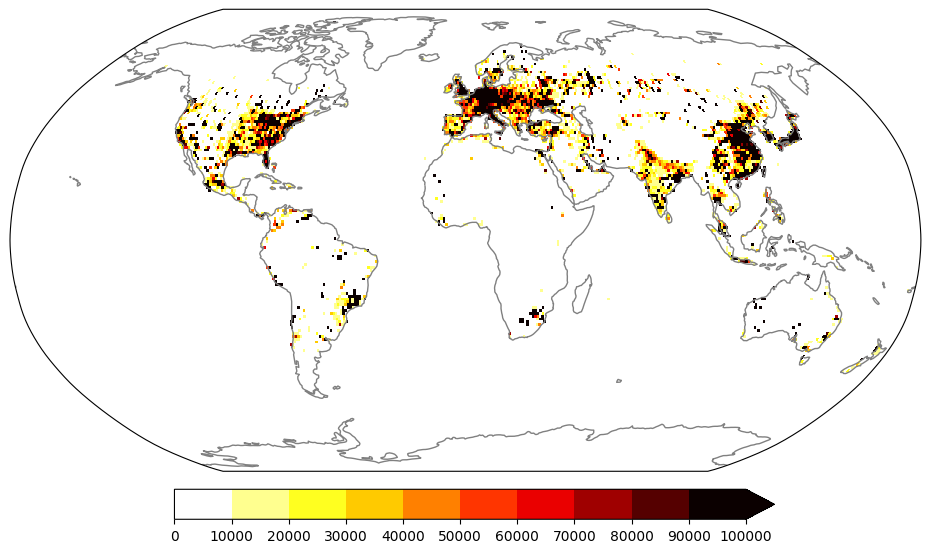

<GeoAxes: >

In [305]:
ssm.plot_map(merged_ds.isel(time=-1), "source_1_adj", vmax=1e5, extend_max=True)

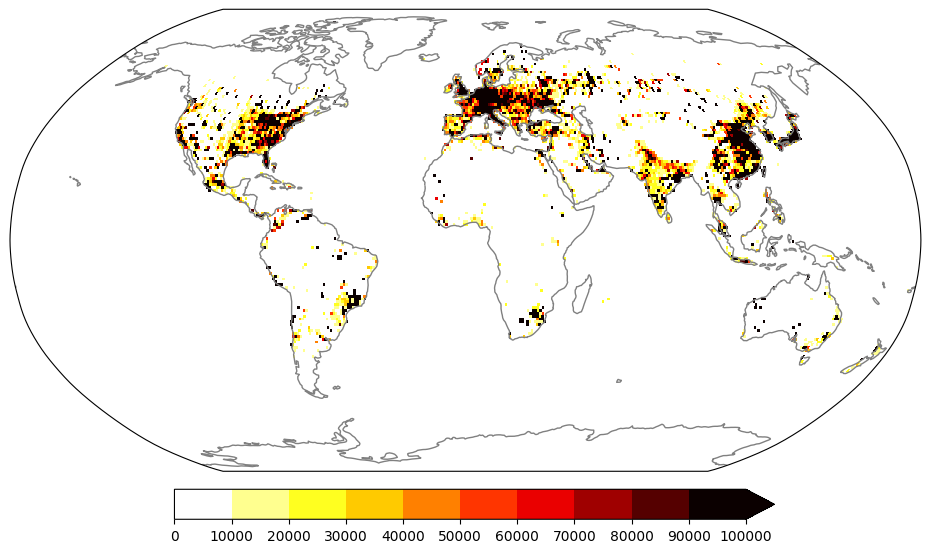

<GeoAxes: >

In [306]:
ssm.plot_map(ds_flow_raw.isel(time=-1), "source_1", vmax=1e5, extend_max=True)

In [307]:
merged_ds.to_netcdf(netcdf_path + 'L.T.iron_flows.2008-2016_adj.a.nc')